In [1]:
install.packages(c("nnet", "ElemStatLearn", "gam", "mda", "e1071"), repos='http://cran.rstudio.com/')

also installing the dependencies 'iterators', 'foreach'



package 'iterators' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'nnet' successfully unpacked and MD5 sums checked
package 'ElemStatLearn' successfully unpacked and MD5 sums checked
package 'gam' successfully unpacked and MD5 sums checked
package 'mda' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\AppData\Local\Temp\RtmpEPidcf\downloaded_packages


In [2]:
library(nnet)

In [3]:
data(iris)

In [4]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [5]:
samp = c(sample(1:50,25), sample(51:100,25), sample(101:150,25))
iris.tr = iris[samp,]
iris.te = iris[-samp,]

In [6]:
ir1 <- nnet(Species~., data=iris.tr, size=2, decap=5e-4)
names(ir1)
summary(ir1)

# weights:  19
initial  value 104.843776 
iter  10 value 65.519705
iter  20 value 34.692737
iter  30 value 34.657481
final  value 34.657359 
converged


[1] "n"             "nunits"        "nconn"         "conn"         
 [5] "nsunits"       "decay"         "entropy"       "softmax"      
 [9] "censored"      "value"         "wts"           "convergence"  
[13] "fitted.values" "residuals"     "lev"           "call"         
[17] "terms"         "coefnames"     "xlevels"

a 4-2-3 network with 19 weights
options were - softmax modelling 
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 
  1.00  -1.12   5.48  -6.23  -9.09 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 
 -0.20  -1.14  -0.99  -1.71  -0.31 
 b->o1 h1->o1 h2->o1 
-12.20  49.69   0.05 
 b->o2 h1->o2 h2->o2 
  6.52 -44.05  -0.32 
 b->o3 h1->o3 h2->o3 
  6.52  -6.02  -0.10 

In [7]:
y = iris.te$Species
p = predict(ir1, iris.te, type="class")
table(y,p)

            p
y            setosa versicolor virginica
  setosa         22          0         3
  versicolor      0         13        12
  virginica       0         15        10

In [8]:
test.err <- function(h.size)
{
  ir <- nnet(Species~., data=iris.tr, size=h.size, decay=5e-4, trace=F)
  y <- iris.te$Species
  p <- predict(ir, iris.te, type="class")
  err = mean(y != p)
  c(h.size, err)
}

In [9]:
out <- t(sapply(2:10, FUN = test.err))

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


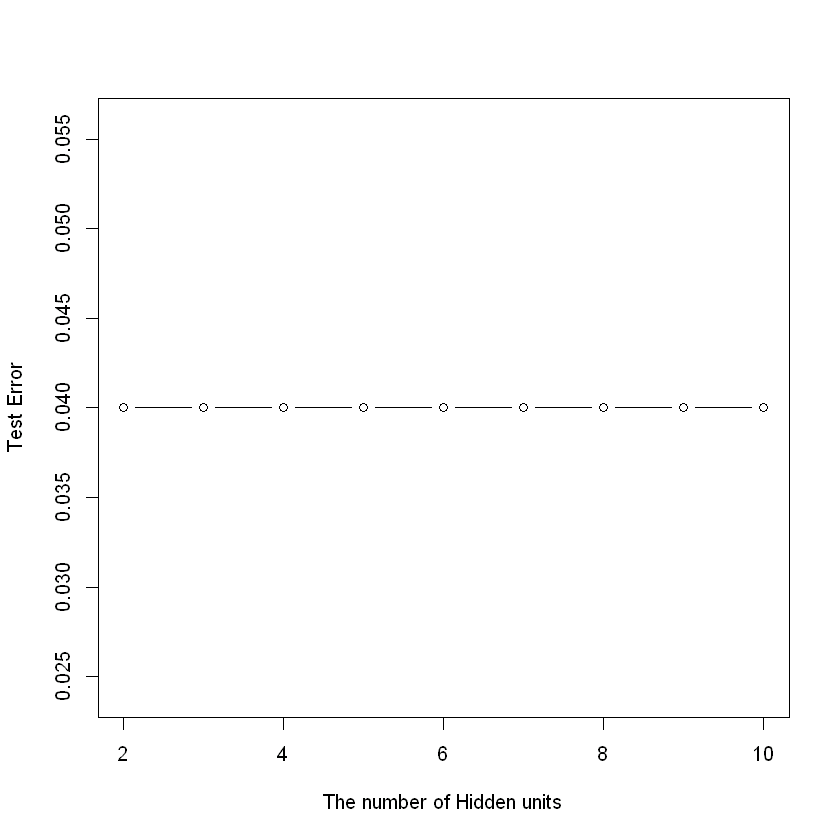

In [14]:
plot(out, type="b", xlab="The number of Hidden units", ylab="Test Error")

In [20]:
library(ElemStatLearn)

In [21]:
library(gam)

In [22]:
data(SAheart)

In [24]:
head(SAheart)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12,5.73,23.11,Present,49,25.3,97.2,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.5,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.6,3.5,27.78,Present,60,25.99,57.34,49,1
6,132,6.2,6.47,36.21,Present,62,30.77,14.14,45,0


In [25]:
str(SAheart)

'data.frame':	462 obs. of  10 variables:
 $ sbp      : int  160 144 118 170 134 132 142 114 114 132 ...
 $ tobacco  : num  12 0.01 0.08 7.5 13.6 6.2 4.05 4.08 0 0 ...
 $ ldl      : num  5.73 4.41 3.48 6.41 3.5 6.47 3.38 4.59 3.83 5.8 ...
 $ adiposity: num  23.1 28.6 32.3 38 27.8 ...
 $ famhist  : Factor w/ 2 levels "Absent","Present": 2 1 2 2 2 2 1 2 2 2 ...
 $ typea    : int  49 55 52 51 60 62 59 62 49 69 ...
 $ obesity  : num  25.3 28.9 29.1 32 26 ...
 $ alcohol  : num  97.2 2.06 3.81 24.26 57.34 ...
 $ age      : int  52 63 46 58 49 45 38 58 29 53 ...
 $ chd      : int  1 1 0 1 1 0 0 1 0 1 ...


In [27]:
heart.fit <- gam(chd~ 1 + s(sbp) + s(tobacco) + s(ldl) + s(adiposity) + famhist + s(typea) + s(obesity) + s(alcohol) + s(age), family = binomial, data=SAheart, trace=T)

GAM s.wam loop 1: deviance = 446.2746 
GAM s.wam loop 2: deviance = 436.7085 
GAM s.wam loop 3: deviance = 434.3667 
GAM s.wam loop 4: deviance = 433.8427 
GAM s.wam loop 5: deviance = 433.7665 
GAM s.wam loop 6: deviance = 433.7608 
GAM s.wam loop 7: deviance = 433.7604 
GAM s.wam loop 8: deviance = 433.7604 


In [28]:
summary(heart.fit)


Call: gam(formula = chd ~ 1 + s(sbp) + s(tobacco) + s(ldl) + s(adiposity) + 
    famhist + s(typea) + s(obesity) + s(alcohol) + s(age), family = binomial, 
    data = SAheart, trace = T)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.8282 -0.7786 -0.3942  0.8104  2.7631 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 596.1084 on 461 degrees of freedom
Residual Deviance: 433.7604 on 427.9998 degrees of freedom
AIC: 501.7608 

Number of Local Scoring Iterations: 8 

Anova for Parametric Effects
              Df Sum Sq Mean Sq F value    Pr(>F)    
s(sbp)         1   5.88  5.8800  6.0570 0.0142450 *  
s(tobacco)     1  17.01 17.0060 17.5180 3.456e-05 ***
s(ldl)         1  14.26 14.2562 14.6855 0.0001461 ***
s(adiposity)   1   1.48  1.4817  1.5263 0.2173469    
famhist        1  19.73 19.7336 20.3278 8.435e-06 ***
s(typea)       1   4.18  4.1846  4.3106 0.0384712 *  
s(obesity)     1  12.22 12.2171 12.5850 0.0004319 ***
s(alcohol)     1   0.

In [30]:
step.fit <- step.gam(heart.fit, scope=list("sbp"=~1+s(abp),"tobacco"=~1+s(tobacco), "ldl" = ~1+s(ldl), "adiposity"=~1+s(adiposity),"famhist"=~1+famhist,"typea"=~1+s(typea),"obesity"=~1+s(obesity),"alcohol"=~1+s(alcohol),"age"=~1+s(age)),direction="backward")

Start:  chd ~ 1 + s(sbp) + s(tobacco) + s(ldl) + s(adiposity) + famhist +      s(typea) + s(obesity) + s(alcohol) + s(age); AIC= 501.7608 
Step:1 chd ~ s(sbp) + s(tobacco) + s(ldl) + s(adiposity) + famhist +      s(typea) + s(obesity) + s(age) ; AIC= 494.4895 
Step:2 chd ~ s(sbp) + s(tobacco) + s(ldl) + famhist + s(typea) + s(obesity) +      s(age) ; AIC= 492.5474 


In [31]:
summary(step.fit)


Call: gam(formula = chd ~ s(sbp) + s(tobacco) + s(ldl) + famhist + 
    s(typea) + s(obesity) + s(age), family = binomial, data = SAheart, 
    trace = FALSE)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.8366 -0.7875 -0.3925  0.8590  2.7795 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 596.1084 on 461 degrees of freedom
Residual Deviance: 440.5473 on 436 degrees of freedom
AIC: 492.5474 

Number of Local Scoring Iterations: 8 

Anova for Parametric Effects
            Df Sum Sq Mean Sq F value    Pr(>F)    
s(sbp)       1   6.43  6.4319  6.5483 0.0108353 *  
s(tobacco)   1  16.85 16.8546 17.1596 4.129e-05 ***
s(ldl)       1  13.87 13.8721 14.1231 0.0001945 ***
famhist      1  19.96 19.9594 20.3206 8.426e-06 ***
s(typea)     1   3.66  3.6626  3.7289 0.0541268 .  
s(obesity)   1   1.92  1.9250  1.9598 0.1622433    
s(age)       1  19.98 19.9771 20.3386 8.351e-06 ***
Residuals  436 428.25  0.9822                      
---
Signif. codes:

In [32]:
plot(step.fit, se=TRUE, ask=T)

ERROR: Error in menu(tmenu, title = "Make a plot selection (or 0 to exit):\n"): menu() cannot be used non-interactively


In [33]:
library(MASS)

In [34]:
attach(rock)

In [35]:
data(rock)

In [36]:
head(rock)

,area,peri,shape,perm
1,4990,2791.9,0.0903296,6.3
2,7002,3892.6,0.148622,6.3
3,7558,3930.66,0.183312,6.3
4,7352,3869.32,0.117063,6.3
5,7943,3948.54,0.122417,17.1
6,7979,4010.15,0.167045,17.1


In [37]:
area1 = area/10000

In [38]:
peri1 = peri/10000

In [39]:
rock.ppr = ppr(log(perm)~area1+peri1+shape, data=rock, nterms=2, max.terms=5)

In [40]:
summary(rock.ppr)

Call:
ppr(formula = log(perm) ~ area1 + peri1 + shape, data = rock, 
    nterms = 2, max.terms = 5)

Goodness of fit:
 2 terms  3 terms  4 terms  5 terms 
8.737806 5.289517 4.745799 4.490378 

Projection direction vectors:
      term 1      term 2     
area1  0.34357179  0.37071027
peri1 -0.93781471 -0.61923542
shape  0.04961846  0.69218595

Coefficients of ridge terms:
   term 1    term 2 
1.6079271 0.5460971 

In [41]:
par(mfrow=c(3,2))

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


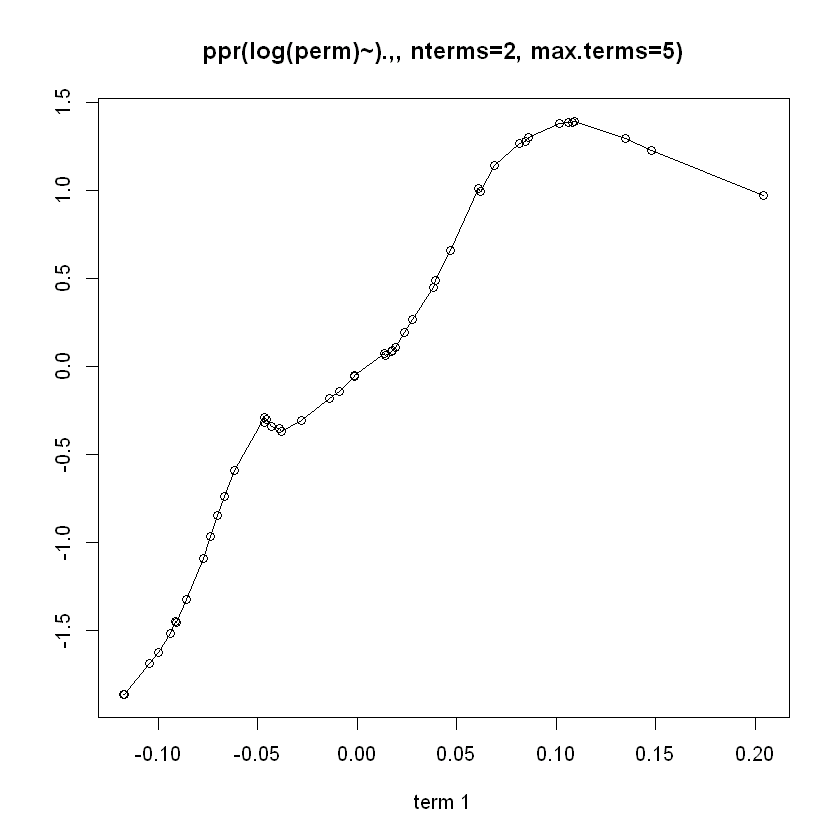

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


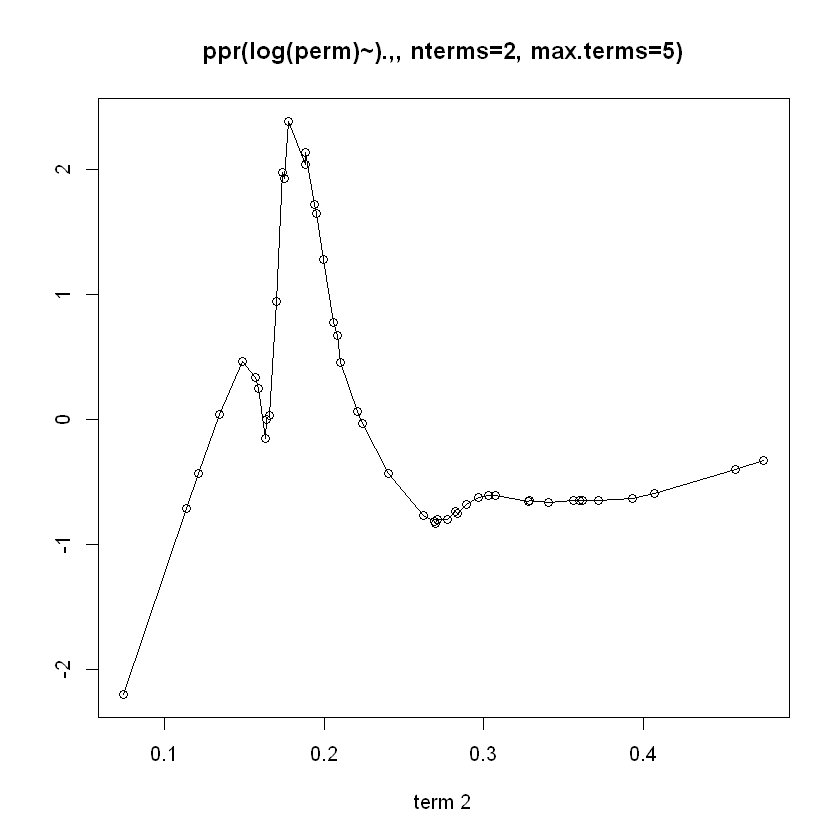

In [43]:
plot(rock.ppr, main="ppr(log(perm)~).,, nterms=2, max.terms=5)")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


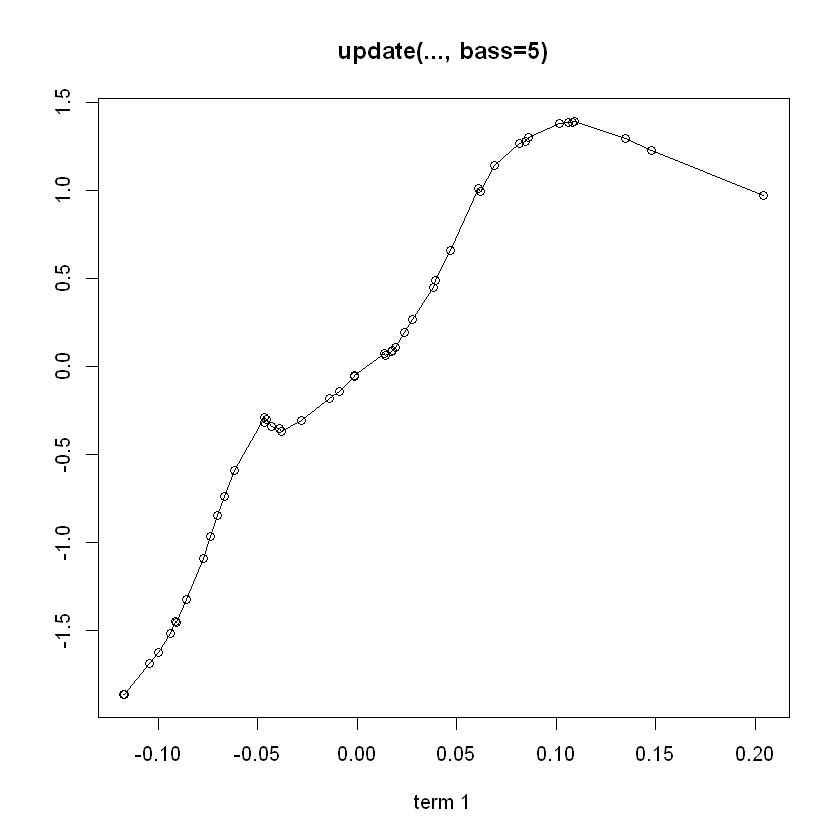

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


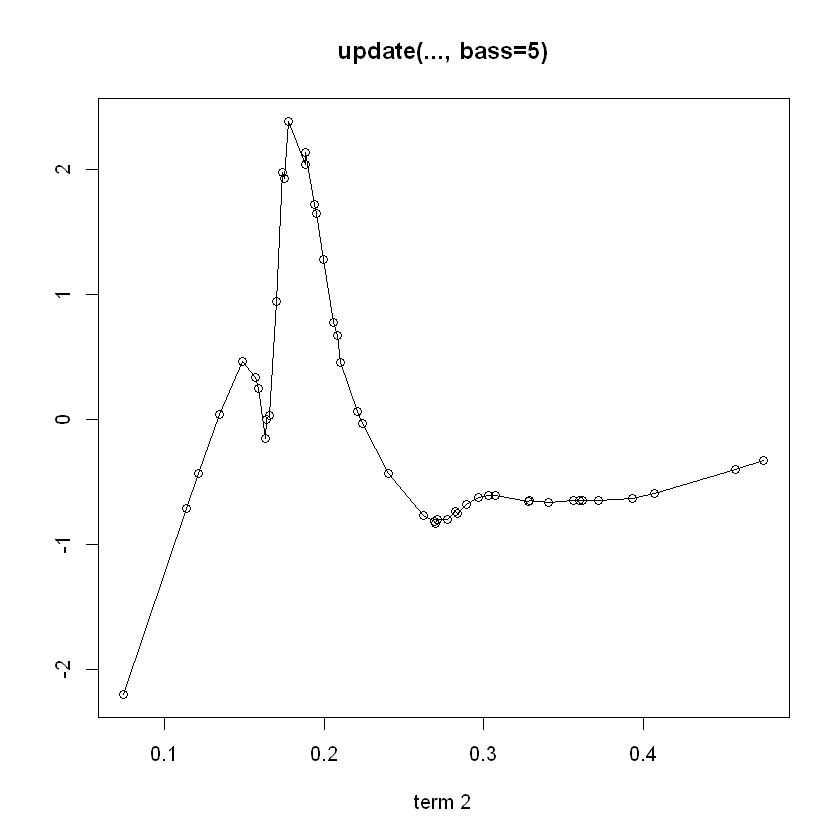

In [44]:
plot(update(rock.ppr, base=5), main="update(..., bass=5)")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


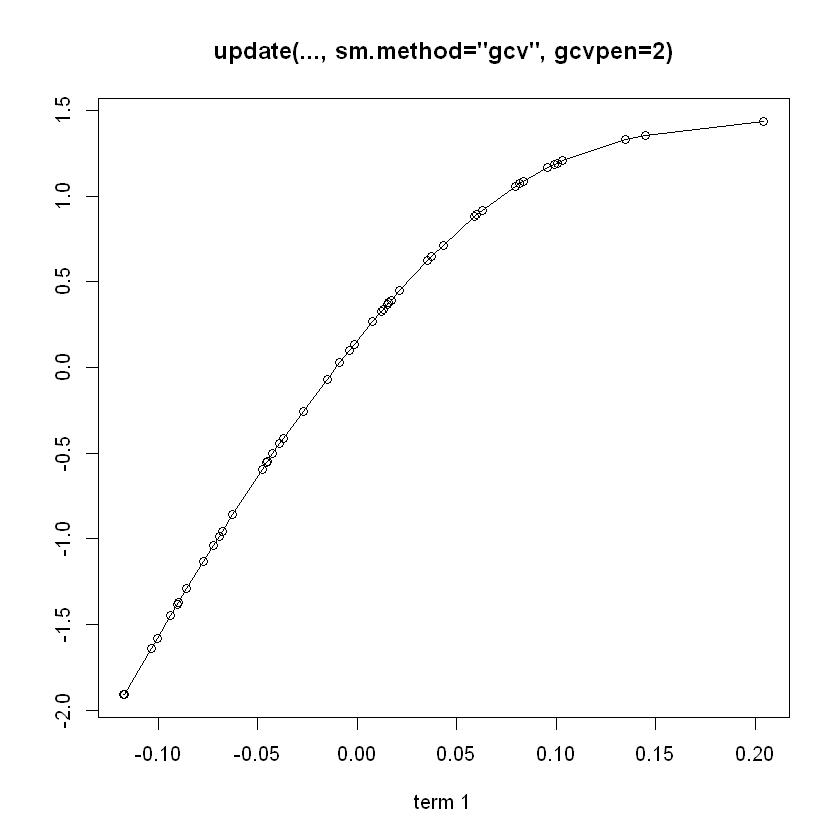

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


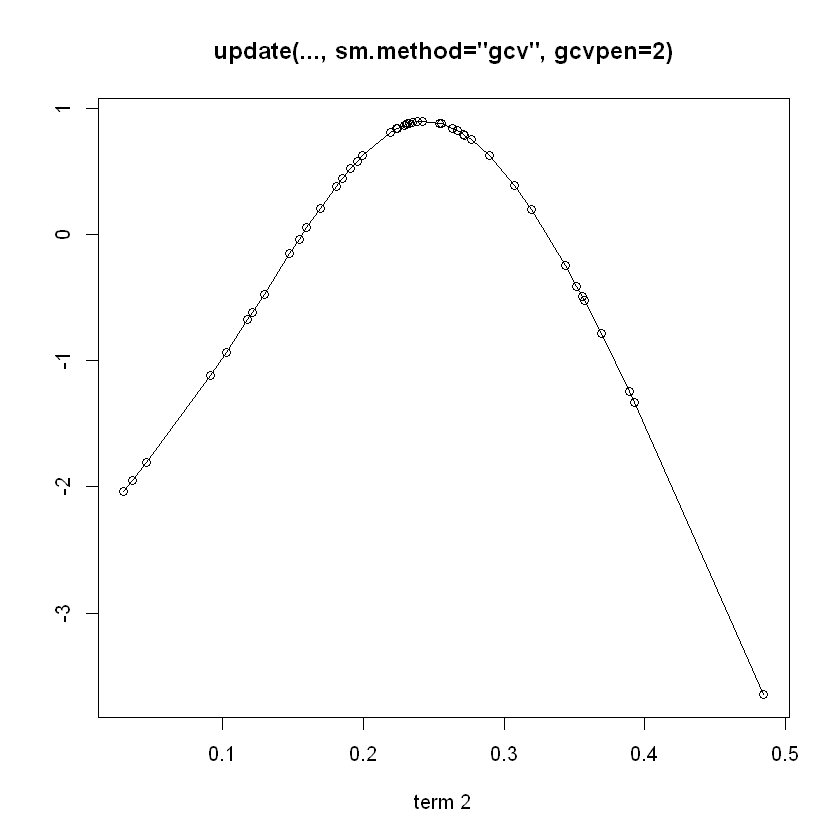

In [45]:
plot(update(rock.ppr, sm.method="gcv", gcvpen=2), main="update(..., sm.method=\"gcv\", gcvpen=2)")

In [46]:
library(mda)

Loading required package: class
Loaded mda 0.4-7



In [47]:
data(trees)

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


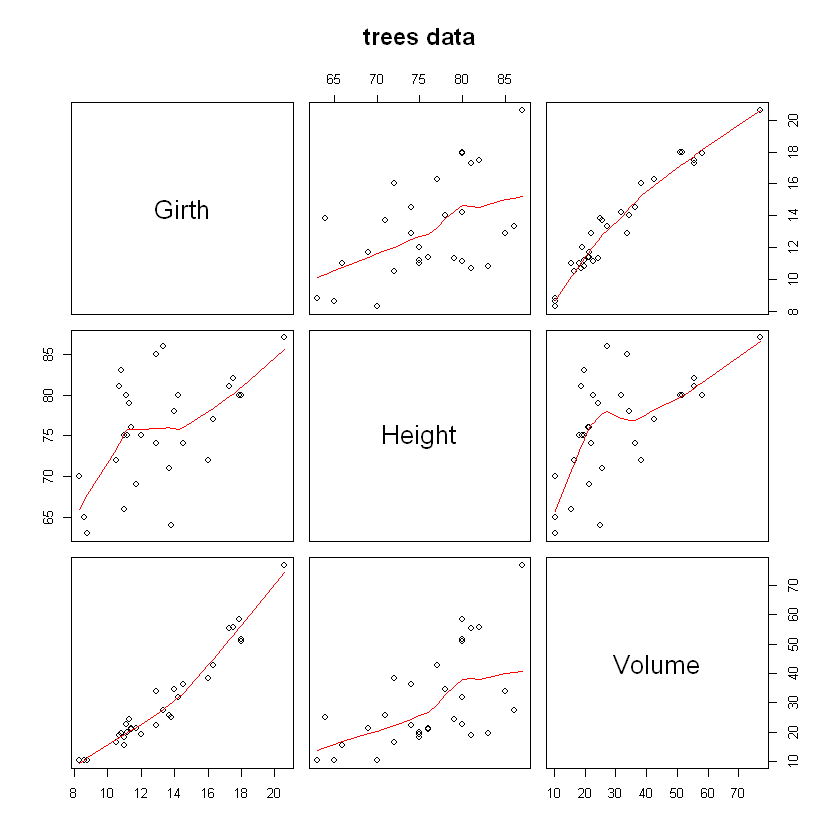

In [48]:
pairs(trees, panel=panel.smooth, main="trees data")

In [49]:
fit1 <- mars(trees[,-3], trees[3])

In [50]:
showcuts <- function(obj){
    tmp <- obj$cuts[obj$sel,]
    dimnames(tmp) <- list(NULL, names(trees)[-3])
    tmp
}

In [51]:
showcuts(fit1)

Girth,Height
0,0
13.8,0.0
13.8,0.0
0,72


In [52]:
Xp <- matrix(sapply(trees[1:2], mean), nrow(trees), 2, byrow=T)

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


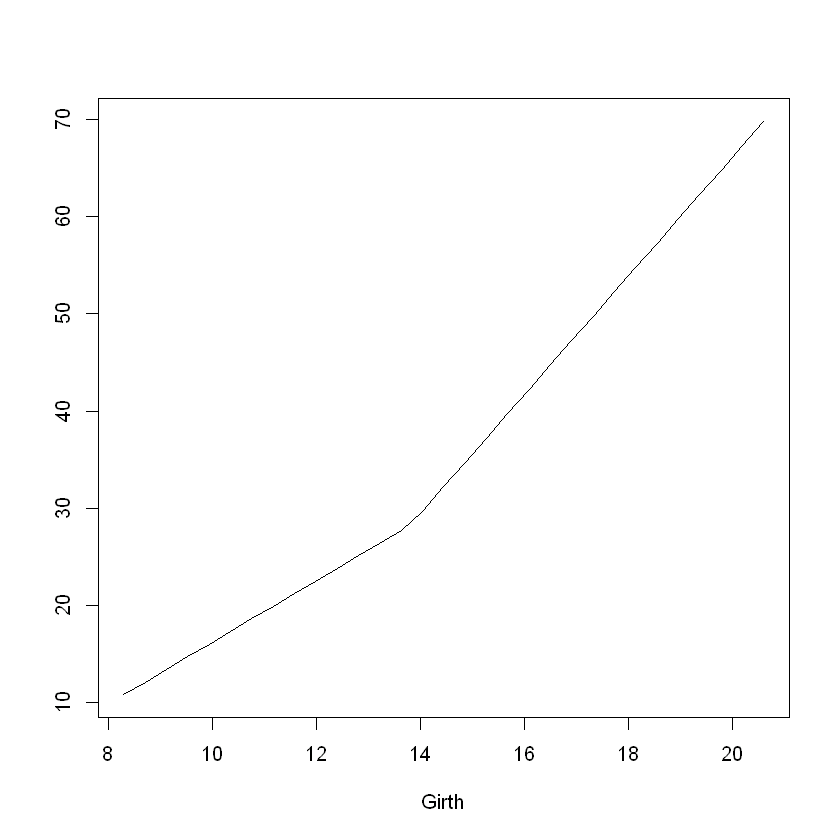

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


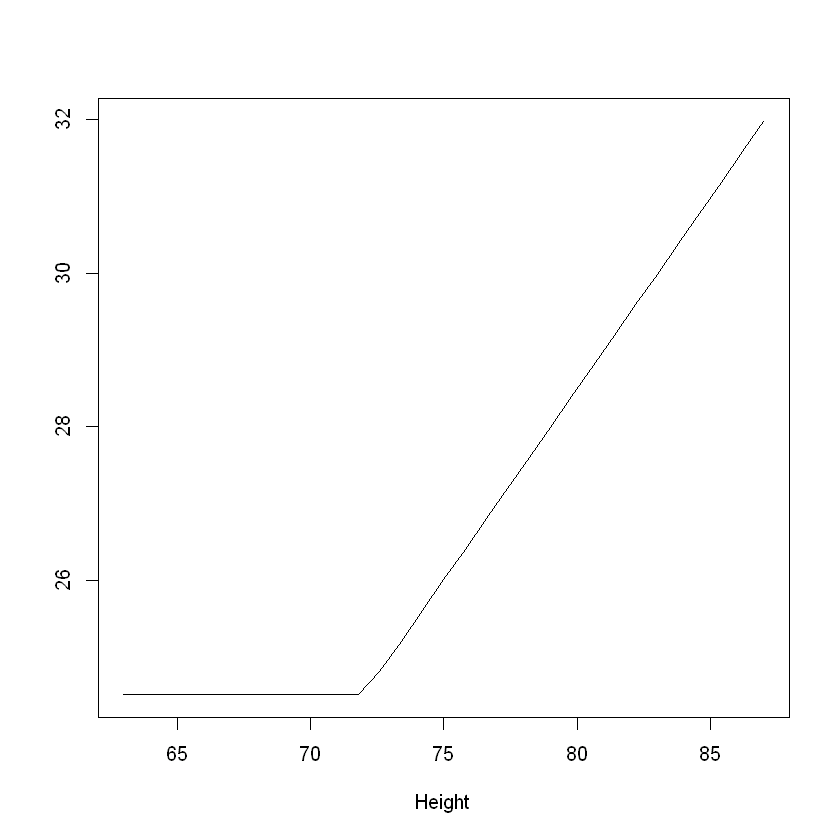

In [55]:
for(i in 1:2){
    xr <- sapply(trees, range)
    Xp1 <- Xp; Xp1[,i] <- seq(xr[1,i], xr[2,i], len=nrow(trees))
    Xf <- predict(fit1, Xp1)
    plot(Xp1[,i], Xf, xlab=names(trees)[i], ylab="", type="l")
}

In [56]:
library(e1071)

In [58]:
install.packages("mlbench", repos='http://cran.rstudio.com/')

package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\AppData\Local\Temp\RtmpEPidcf\downloaded_packages


In [59]:
library(mlbench)

In [60]:
data(HouseVotes84, package="mlbench")

In [61]:
HouseVotes84

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,republican,n,y,n,y,y,y,n,n,n,y,NA,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NA
3,democrat,NA,y,y,NA,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NA,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NA,y,y,y,y
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NA,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NA,y
9,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
10,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NA,NA


In [62]:
model <- naiveBayes(Class ~., data=HouseVotes84)

In [64]:
predict(model, HouseVotes84[1:10,-1])

[1] republican republican republican democrat   democrat   democrat  
 [7] republican republican republican democrat  
Levels: democrat republican

In [65]:
predict(model, HouseVotes84[1:10,-1], type="raw")

democrat,republican
1.029209e-07,9.999999e-01
5.820415e-08,9.999999e-01
0.005684937,0.994315063
0.998579848,0.001420152
0.96667198,0.03332802
0.812143,0.187857
0.0001751512,0.9998248488
0.0000083001,0.9999916999
8.277705e-08,9.999999e-01
1.000000e+00,5.029425e-11


In [66]:
pred <- predict(model, HouseVotes84[,-1])

In [67]:
table(pred, HouseVotes84$Class)

            
pred         democrat republican
  democrat        238         13
  republican       29        155

In [68]:
model <- naiveBayes(Class~., data=HouseVotes84, laplace=3)

In [69]:
pred <- predict(model, HouseVotes84[,-1])

In [70]:
table(pred, HouseVotes84$Class)

            
pred         democrat republican
  democrat        237         12
  republican       30        156

In [71]:
library(class)

In [72]:
data(iris)

In [73]:
set.seed(1)

In [74]:
y = iris[,5]

In [75]:
tr.idx = sample(length(y), 75)

In [76]:
x.tr = iris[tr.idx,-5]

In [77]:
x.te = iris[-tr.idx, -5]

In [78]:
m1 <- knn(x.tr, x.te, y[tr.idx], k=3)

In [79]:
mean(m1 != y[-tr.idx])

[1] 0.04

In [7]:
install.packages(c("princomp", "fastICA", "psych"), repos='http://cran.rstudio.com/')

Warning message:
: package 'princomp' is not available (as a binary package for R version 3.1.3)

package 'fastICA' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\AppData\Local\Temp\Rtmp2xQ7Ua\downloaded_packages


ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


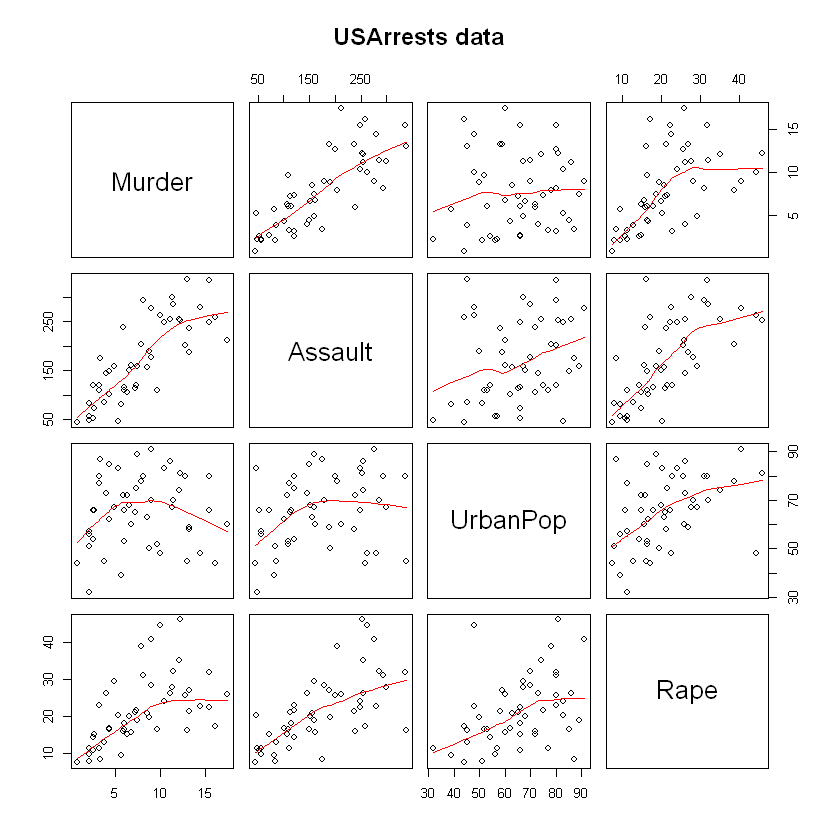

In [2]:
pairs(USArrests, panel=panel.smooth, main="USArrests data")

In [3]:
p1 <- princomp(USArrests, cor=T)

In [4]:
summary(p1)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

In [5]:
loadings(p1)


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder   -0.536  0.418 -0.341  0.649
Assault  -0.583  0.188 -0.268 -0.743
UrbanPop -0.278 -0.873 -0.378  0.134
Rape     -0.543 -0.167  0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [8]:
library(fastICA)

In [9]:
S <- cbind(sin(1:1000)/20, rep((((1:200)-100)/100),5))

In [10]:
S

0.04207355,-0.99000000
0.04546487,-0.98000000
0.007056,-0.970000
-0.03784012,-0.96000000
-0.04794621,-0.95000000
-0.01397077,-0.94000000
0.03284933,-0.93000000
0.04946791,-0.92000000
0.02060592,-0.91000000
-0.02720106,-0.90000000
-0.04999951,-0.89000000


In [11]:
A <- matrix(c(0.291, 0.6557, -0.5439, 0.5572),2,2)

In [12]:
X <- S%*%A

In [13]:
a <- fastICA(X, 2, alg.typ="parallel", fun="logcosh", alpha=1, method="R", row.norm=FALSE, maxit=200, tol=1e-4, verbose=T)

Centering
Whitening
Symmetric FastICA using logcosh approx. to neg-entropy function
Iteration 1 tol = 0.003917179
Iteration 2 tol = 1.494174e-09


ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


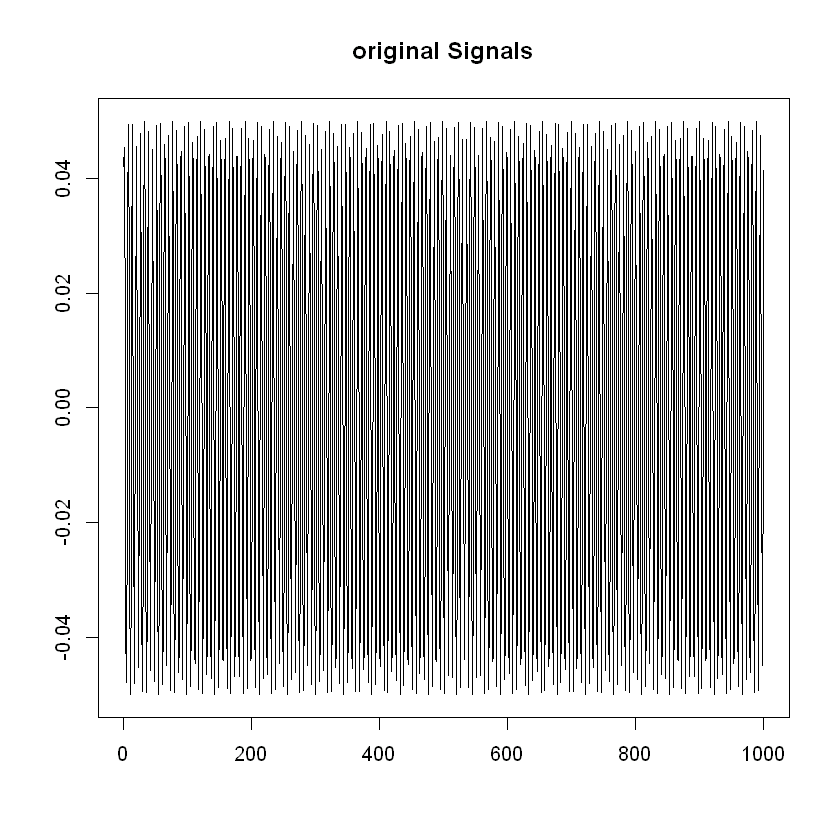

In [14]:
plot(1:1000, S[,1], type="l", main="original Signals", xlab="", ylab="")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


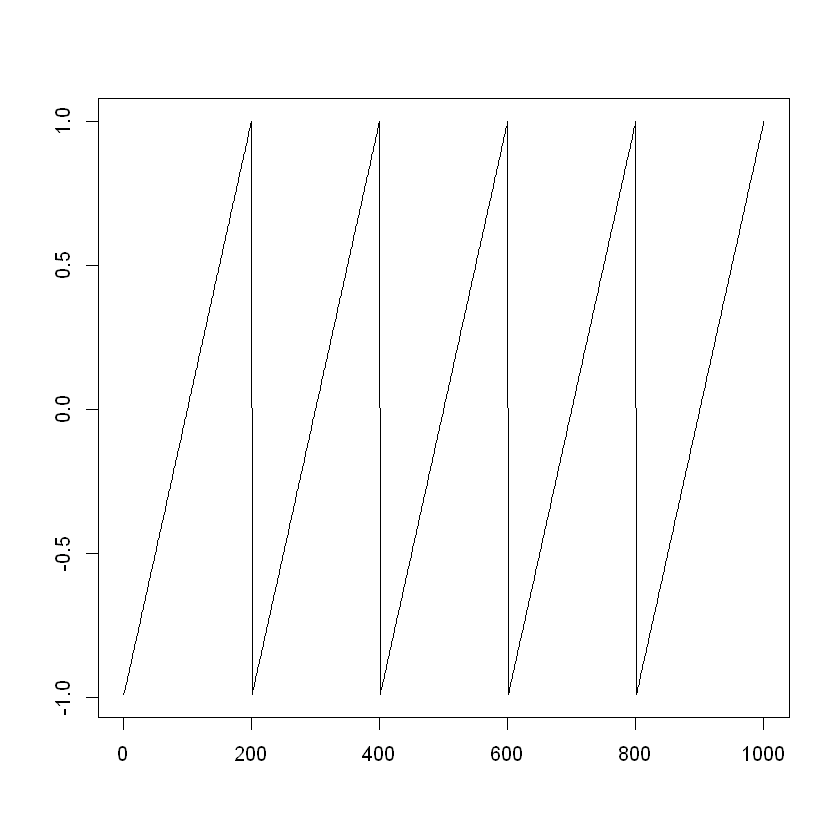

In [15]:
plot(1:1000, S[,2], type="l", xlab="", ylab="")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


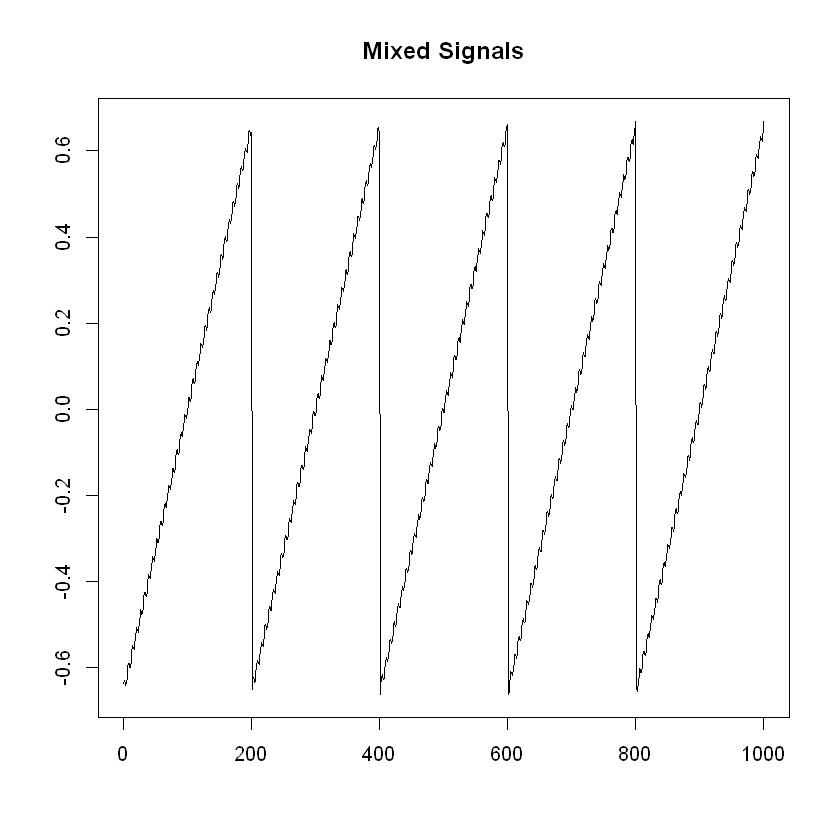

In [16]:
plot(1:1000, X[,1], type="l", main="Mixed Signals", xlab="", ylab="")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


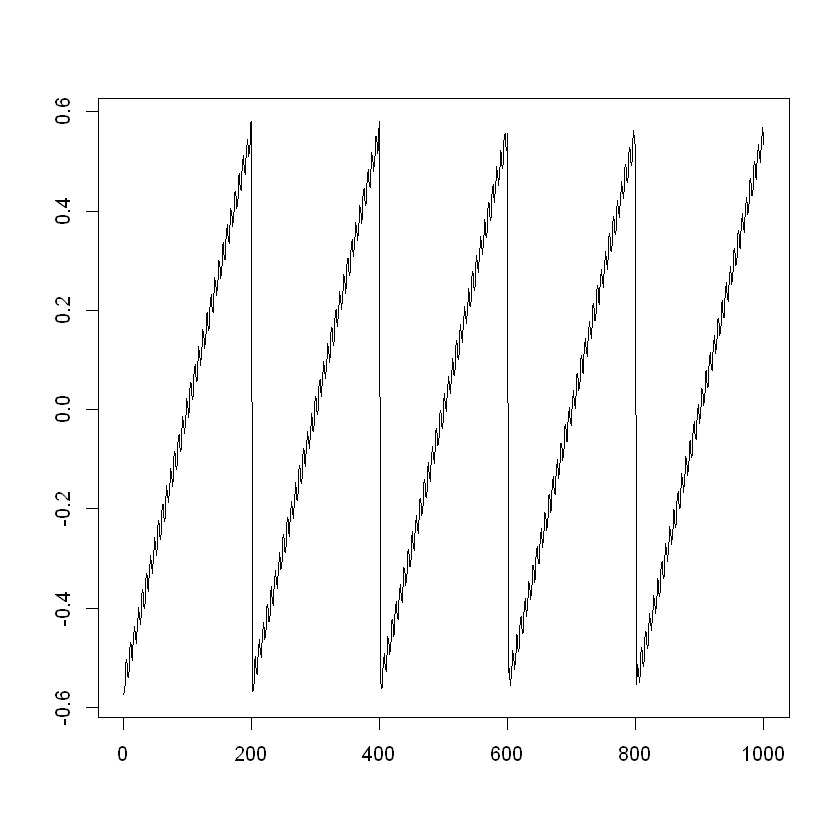

In [17]:
plot(1:1000, X[,2], type="l", xlab="", ylab="")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


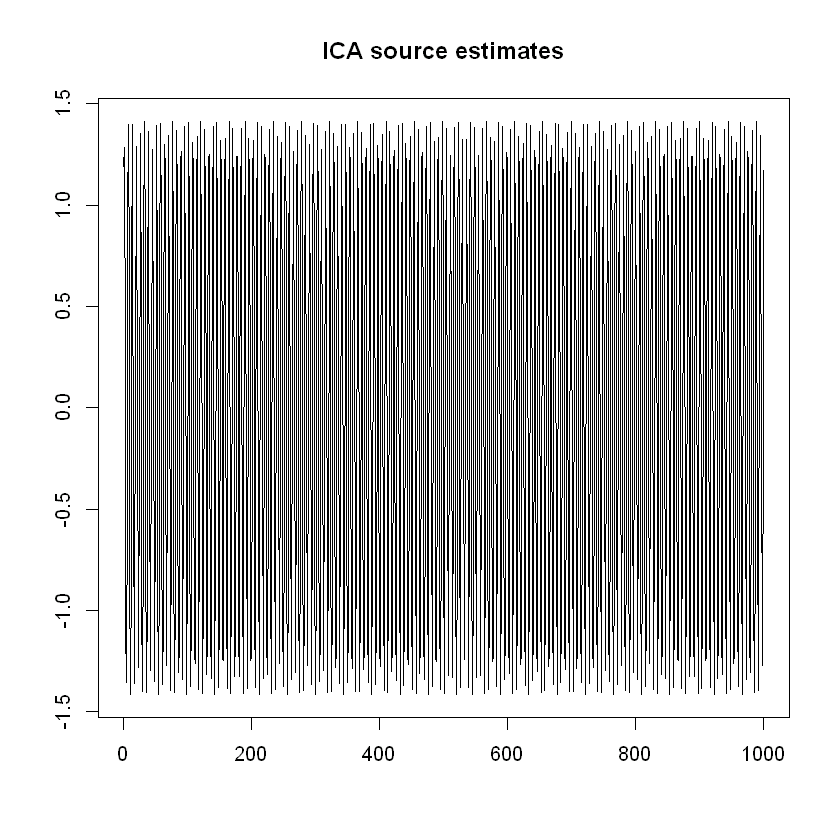

In [18]:
plot(1:1000, a$S[,1], type="l", main="ICA source estimates", xlab="", ylab="")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


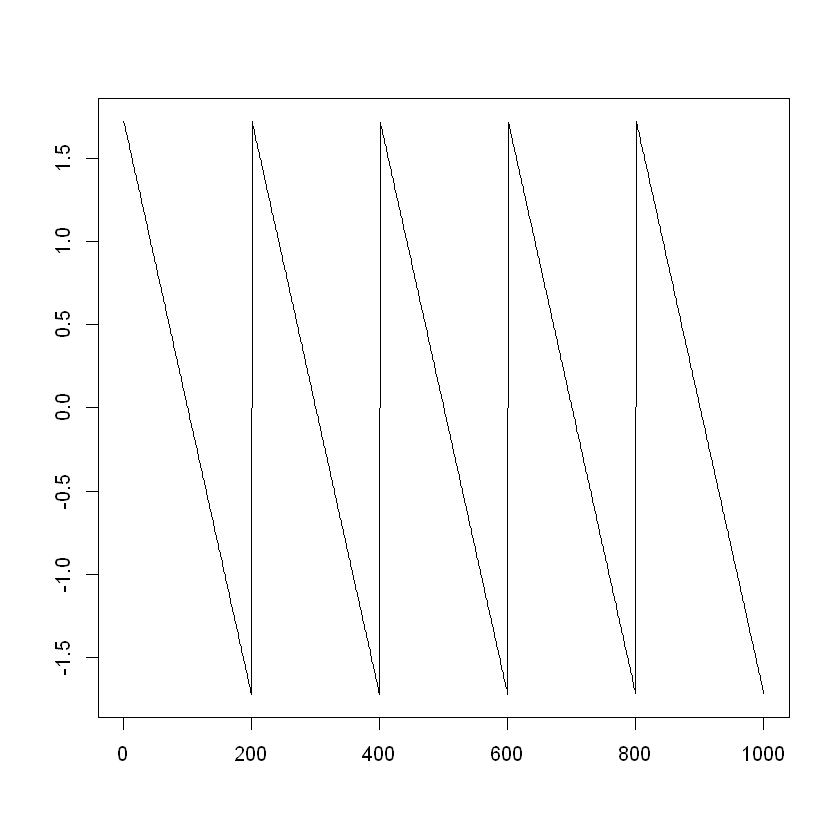

In [19]:
plot(1:1000, a$S[,2], type="l", xlab="", ylab="")

In [20]:
S <- matrix(runif(1000), 500, 2)

In [21]:
A <- matrix(c(1,1,-1,3),2,2,byrow=T)

In [22]:
X <- S%*%A

In [23]:
a <- fastICA(X, 2, alg.typ="parallel", fun="logcosh", alpha=1, method="C", row.norm=F, maxit=200, tol=1e-4, verbose=T)

Centering
Whitening
Symmetric FastICA using logcosh approx. to neg-entropy function
Iteration 1 tol=0.000339
Iteration 2 tol=0.000000


In [24]:
library(psych)

In [25]:
data(Harman)

In [28]:
head(Harman.Holzinger)

,Word_meaning,Sentence_completion,Odd_words,Mixed_Arithmetic,Remainders,Missing_Numbers,Gloves,Boots,Hatchets
Word_meaning,1.00,0.75,0.78,0.44,0.45,0.51,0.21,0.30,0.31
Sentence_completion,0.75,1.00,0.72,0.52,0.53,0.58,0.23,0.32,0.30
Odd_words,0.78,0.72,1.00,0.47,0.48,0.54,0.28,0.37,0.37
Mixed_Arithmetic,0.44,0.52,0.47,1.00,0.82,0.82,0.33,0.33,0.31
Remainders,0.45,0.53,0.48,0.82,1.00,0.74,0.37,0.36,0.36
Missing_Numbers,0.51,0.58,0.54,0.82,0.74,1.00,0.35,0.38,0.38


ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


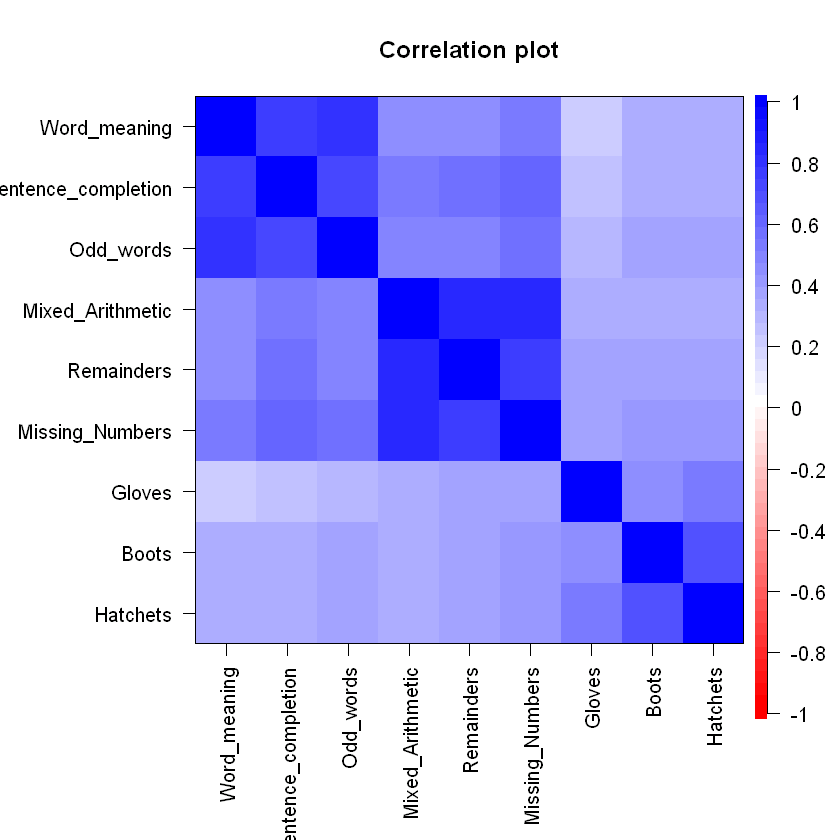

In [29]:
cor.plot(Harman.Holzinger)

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


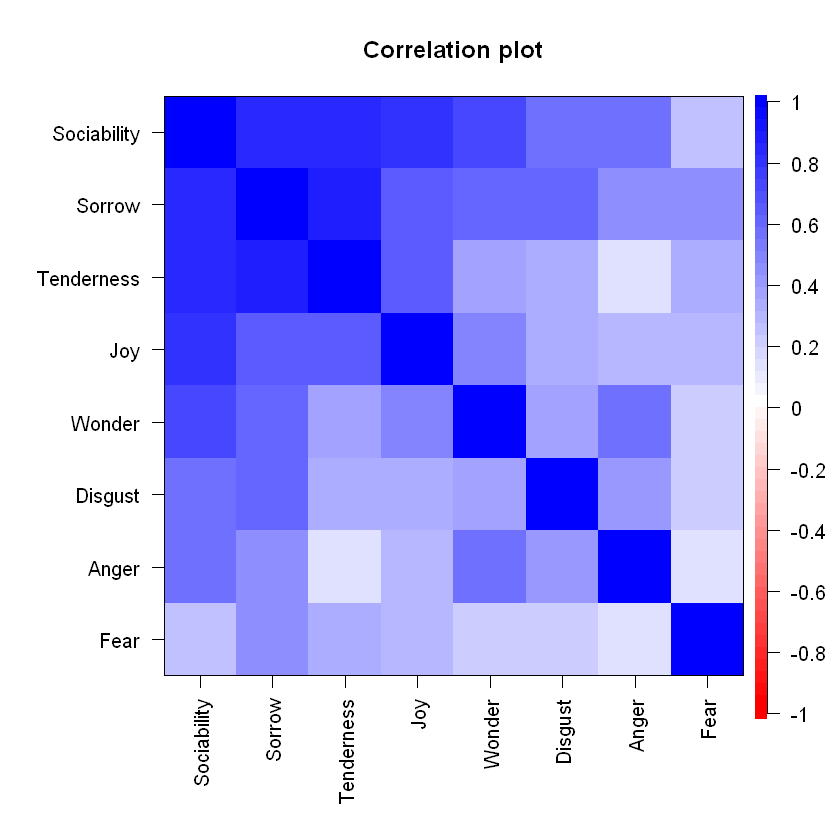

In [30]:
cor.plot(Harman.Burt)

In [31]:
smc(Harman.Burt)

Warning message:
In cor.smooth(R): Matrix was not positive definite, smoothing was done

Sociability      Sorrow  Tenderness         Joy      Wonder     Disgust 
  1.0000000   1.0000000   1.0000000   1.0000000   1.0000000   1.0000000 
      Anger        Fear 
  1.0000000   0.9987481

In [32]:
data(Harman74.cor)

In [33]:
(Harman74.FA <- factanal(factors=1, covmat=Harman74.cor))


Call:
factanal(factors = 1, covmat = Harman74.cor)

Uniquenesses:
      VisualPerception                  Cubes         PaperFormBoard 
                 0.677                  0.866                  0.830 
                 Flags     GeneralInformation  PargraphComprehension 
                 0.768                  0.487                  0.491 
    SentenceCompletion     WordClassification            WordMeaning 
                 0.500                  0.514                  0.474 
              Addition                   Code           CountingDots 
                 0.818                  0.731                  0.824 
StraightCurvedCapitals        WordRecognition      NumberRecognition 
                 0.681                  0.833                  0.863 
     FigureRecognition           ObjectNumber           NumberFigure 
                 0.775                  0.812                  0.778 
            FigureWord              Deduction       NumericalPuzzles 
                 0.816 

In [34]:
for(factors in 2:5){
    print(update(Harman74.FA, factors=factors))
}


Call:
factanal(factors = factors, covmat = Harman74.cor)

Uniquenesses:
      VisualPerception                  Cubes         PaperFormBoard 
                 0.650                  0.864                  0.844 
                 Flags     GeneralInformation  PargraphComprehension 
                 0.778                  0.375                  0.316 
    SentenceCompletion     WordClassification            WordMeaning 
                 0.319                  0.503                  0.258 
              Addition                   Code           CountingDots 
                 0.670                  0.608                  0.581 
StraightCurvedCapitals        WordRecognition      NumberRecognition 
                 0.567                  0.832                  0.850 
     FigureRecognition           ObjectNumber           NumberFigure 
                 0.743                  0.770                  0.625 
            FigureWord              Deduction       NumericalPuzzles 
                 

In [35]:
Harman74.FA <- factanal(factors=5, covmat=Harman74.cor, rotation="promax")

In [36]:
print(Harman74.FA$loadings, sort=T)


Loadings:
                       Factor1 Factor2 Factor3 Factor4 Factor5
VisualPerception        0.831          -0.127           0.230 
Cubes                   0.534                                 
PaperFormBoard          0.736          -0.290           0.136 
Flags                   0.647                  -0.104         
SeriesCompletion        0.555   0.126   0.127                 
GeneralInformation              0.764                         
PargraphComprehension           0.845  -0.140   0.140         
SentenceCompletion              0.872          -0.140         
WordClassification      0.277   0.505   0.104                 
WordMeaning                     0.846  -0.108                 
Addition               -0.334           1.012                 
CountingDots            0.206  -0.200   0.722           0.185 
ArithmeticProblems              0.197   0.500   0.139         
WordRecognition        -0.126   0.127  -0.103   0.657         
NumberRecognition                           

In [38]:
library(MASS)

In [43]:
loc <- cmdscale(eurodist)

In [44]:
eurodist

                Athens Barcelona Brussels Calais Cherbourg Cologne Copenhagen
Barcelona         3313                                                       
Brussels          2963      1318                                             
Calais            3175      1326      204                                    
Cherbourg         3339      1294      583    460                             
Cologne           2762      1498      206    409       785                   
Copenhagen        3276      2218      966   1136      1545     760           
Geneva            2610       803      677    747       853    1662       1418
Gibraltar         4485      1172     2256   2224      2047    2436       3196
Hamburg           2977      2018      597    714      1115     460        460
Hook of Holland   3030      1490      172    330       731     269        269
Lisbon            4532      1305     2084   2052      1827    2290       2971
Lyons             2753       645      690    739       789     7

In [45]:
x

Athens       Barcelona        Brussels          Calais       Cherbourg 
    2290.274680     -825.382790       59.183341      -82.845973     -352.499435 
        Cologne      Copenhagen          Geneva       Gibraltar         Hamburg 
     293.689633      681.931545       -9.423364    -2048.449113      561.108970 
Hook of Holland          Lisbon           Lyons          Madrid      Marseilles 
     164.921799    -1935.040811     -226.423236    -1423.353697     -299.498710 
          Milan          Munich           Paris            Rome       Stockholm 
     260.878046      587.675679     -156.836257      709.413282      839.445911 
         Vienna 
     911.230500

In [40]:
x <- loc[,1]

In [41]:
y <- -loc[,2]

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


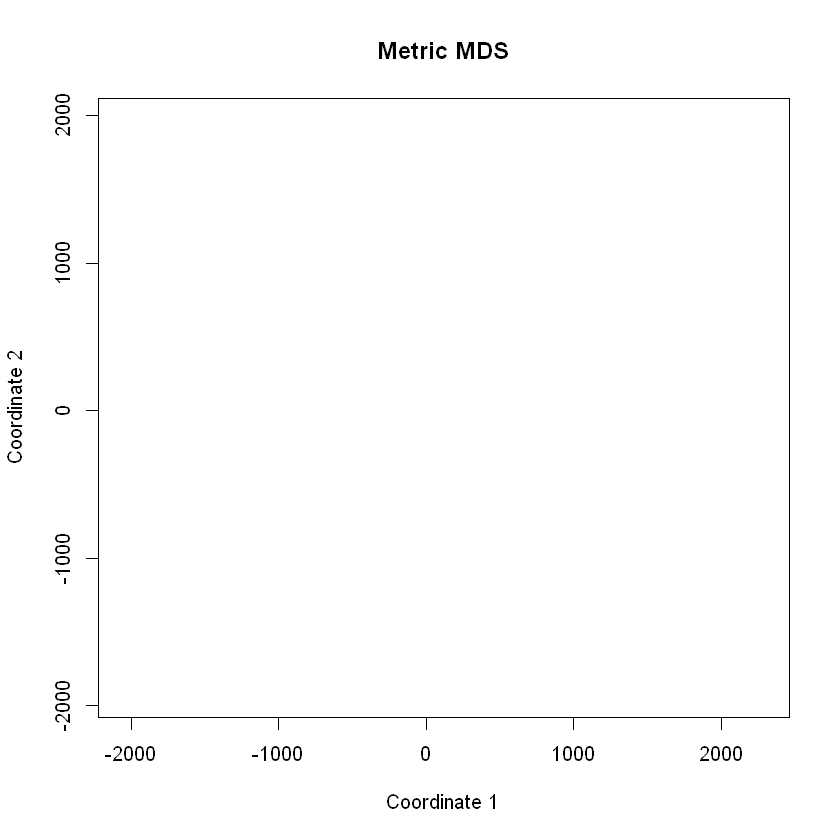

In [46]:
plot(x, y, type="n", xlab="Coordinate 1", ylab="Coordinate 2", asp=1, main="Metric MDS")

In [48]:
text(x, y, rownames(loc), cex=0.7)

ERROR: Error in text.default(x, y, rownames(loc), cex = 0.7): plot.new has not been called yet


In [49]:
library(MASS)

In [50]:
data(swiss)

In [51]:
swiss.x <- as.matrix(swiss[,-1])

In [52]:
swiss.dist <- dist(swiss.x)

In [53]:
swiss.mds <- isoMDS(swiss.dist)

initial  value 2.979731 
iter   5 value 2.431486
iter  10 value 2.343353
final  value 2.338839 
converged


ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


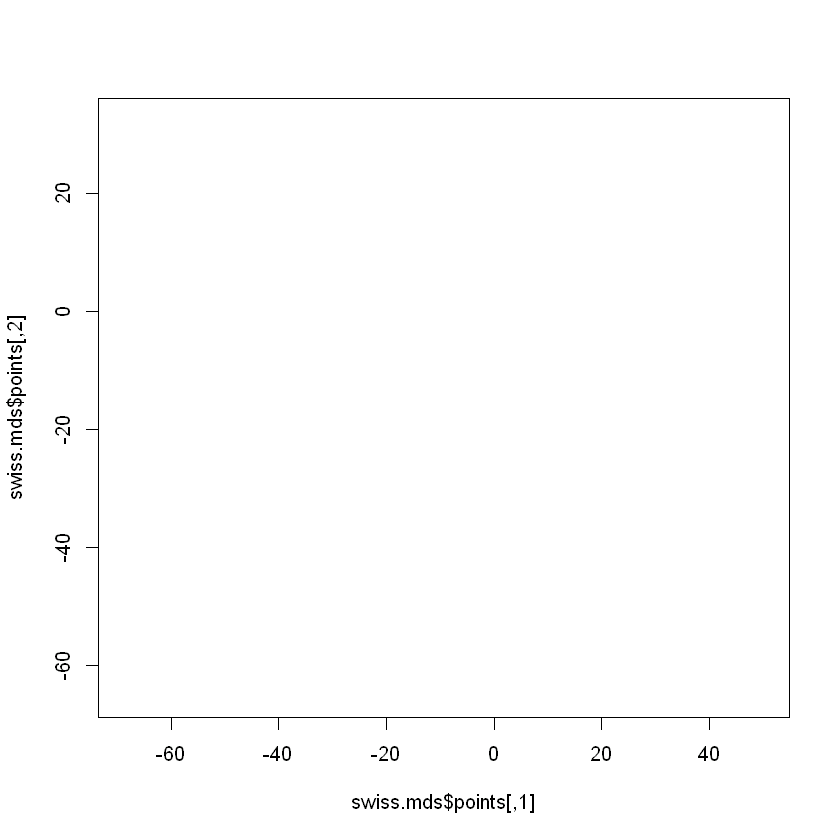

In [54]:
plot(swiss.mds$points, type="n")

In [55]:
swiss.x <- as.matrix(swiss[,-1])

In [56]:
swiss.sam <- sammon(dist(swiss.x))

Initial stress        : 0.00824
stress after  10 iters: 0.00439, magic = 0.338
stress after  20 iters: 0.00383, magic = 0.500
stress after  30 iters: 0.00383, magic = 0.500


In [57]:
swiss.sam

ERROR: Error in vapply(seq_along(mapped), function(i) {: 길이가 반드시 1이어야 하지만,
FUN(X[[3]])의 결과는 길이 0 입니다


$points
                   [,1]       [,2]
Courtelary    41.547171 -18.918701
Delemont     -40.720544 -17.862393
Franches-Mnt -49.930840 -26.660688
Moutier       10.337064  -9.002244
Neuveville    35.008329   3.700321
Porrentruy   -43.981743 -30.044501
Broye        -53.961036   4.662666
Glane        -57.735863   1.306075
Gruyere      -56.178650 -13.581662
Sarine       -46.812706 -19.291445
Veveyse      -59.090223  -2.276227
Aigle         23.981129  19.668050
Aubonne       31.670988  29.239629
Avenches      30.873834  21.316451
Cossonay      26.423248  30.288934
Echallens      8.362595  27.607783
Grandson      43.276714  -2.086955
Lausanne      34.066515 -28.147974
La Vallee     53.667974 -24.690670
Lavaux        26.373380  33.931533
Morges        27.865651  18.346204
Moudon        37.902636  17.917360
Nyone         23.817964   7.238981
Orbe          32.046500  14.357752
Oron          32.517781  35.337672
Payerne       34.676389  19.877845
Paysd'enhaut  38.549097  28.926763
Rolle       

In [58]:
install.packages(c("arules"), repos='http://cran.rstudio.com/')

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\AppData\Local\Temp\Rtmp2xQ7Ua\downloaded_packages


In [59]:
library(arules)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    %in%, write



In [60]:
a_list <- list(c("a","b","c"), c("a","b"), c("a","b","d"), c("c","e"), c("a","b","d","e"))

In [61]:
names(a_list) <- paste("Tr", c(1:5), sep="")

In [62]:
a_list

$Tr1
[1] "a" "b" "c"

$Tr2
[1] "a" "b"

$Tr3
[1] "a" "b" "d"

$Tr4
[1] "c" "e"

$Tr5
[1] "a" "b" "d" "e"

In [63]:
trans <- as(a_list, "transactions")

In [64]:
summary(trans)

transactions as itemMatrix in sparse format with
 5 rows (elements/itemsets/transactions) and
 5 columns (items) and a density of 0.56 

most frequent items:
      a       b       c       d       e (Other) 
      4       4       2       2       2       0 

element (itemset/transaction) length distribution:
sizes
2 3 4 
2 2 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     2.0     3.0     2.8     3.0     4.0 

includes extended item information - examples:
  labels
1      a
2      b
3      c

includes extended transaction information - examples:
  transactionID
1           Tr1
2           Tr2
3           Tr3

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


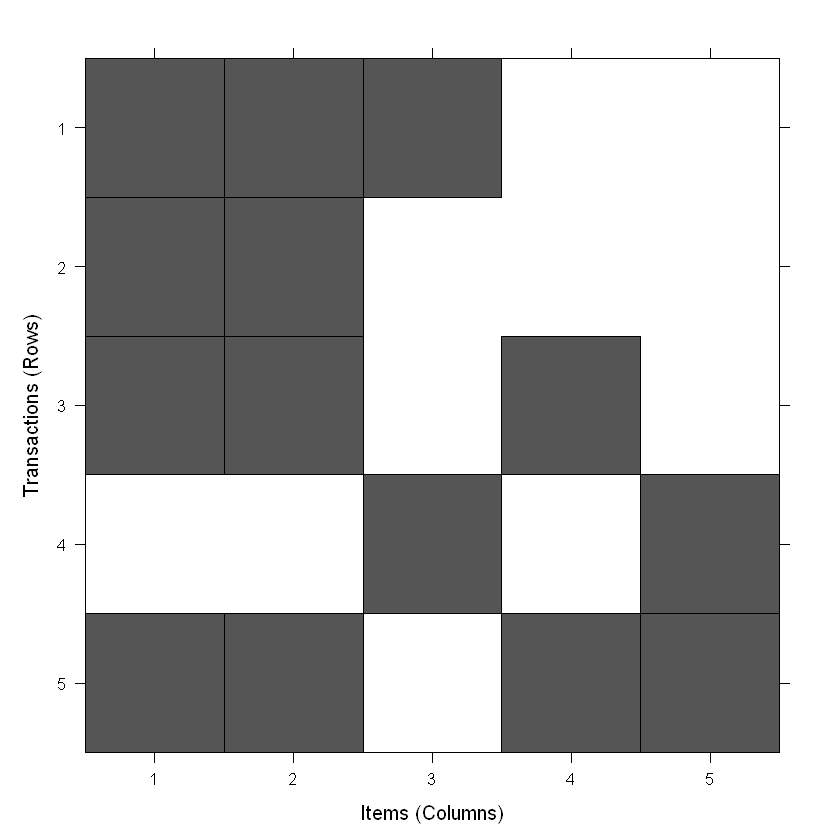

In [65]:
image(trans)

In [66]:
a_matrix <- matrix(c(1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1), ncol=5)

In [67]:
dimnames(a_matrix) <- list(c("a","b","c","d","e"), paste("Tr",c(1:5),sep=""))

In [68]:
a_matrix

,Tr1,Tr2,Tr3,Tr4,Tr5
a,1,1,1,0,1
b,1,1,1,0,1
c,1,0,0,1,0
d,0,0,1,0,1
e,0,0,0,1,1


In [69]:
trans2 <- as(a_matrix, "transactions")

In [70]:
trans2

transactions in sparse format with
 5 transactions (rows) and
 5 items (columns)

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


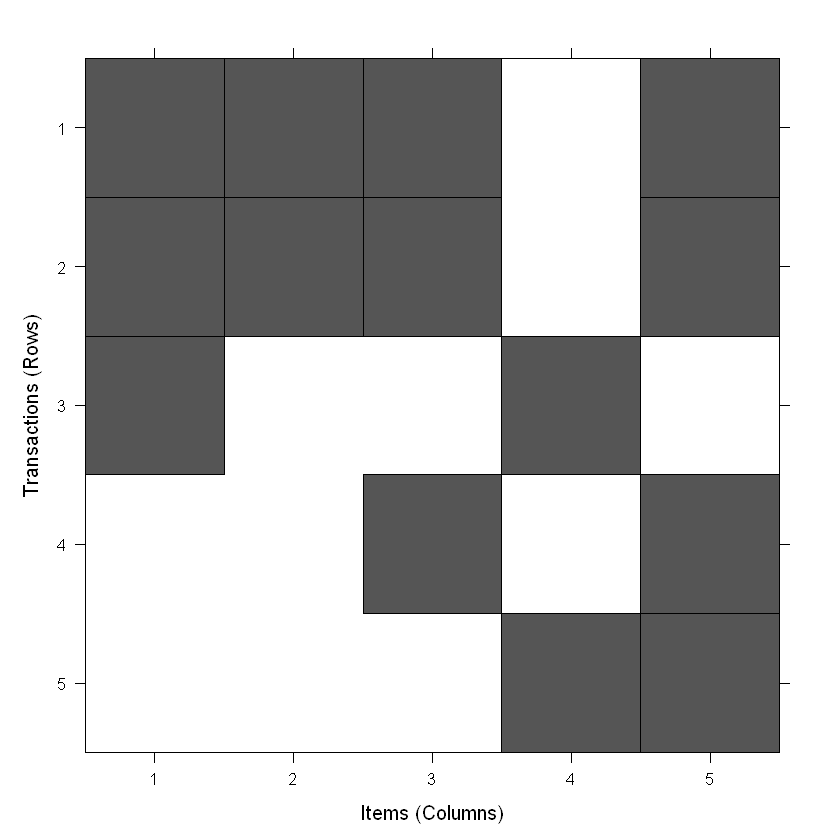

In [71]:
image(trans2)

In [72]:
a_data.frame <- data.frame(age=as.factor(c(6,8,7,6,9,5)), grade=as.factor(c(1,3,1,1,4,1)))

In [73]:
a_data.frame

,age,grade
1,6,1
2,8,3
3,7,1
4,6,1
5,9,4
6,5,1


In [74]:
trans3 <- as(a_data.frame, "transactions")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


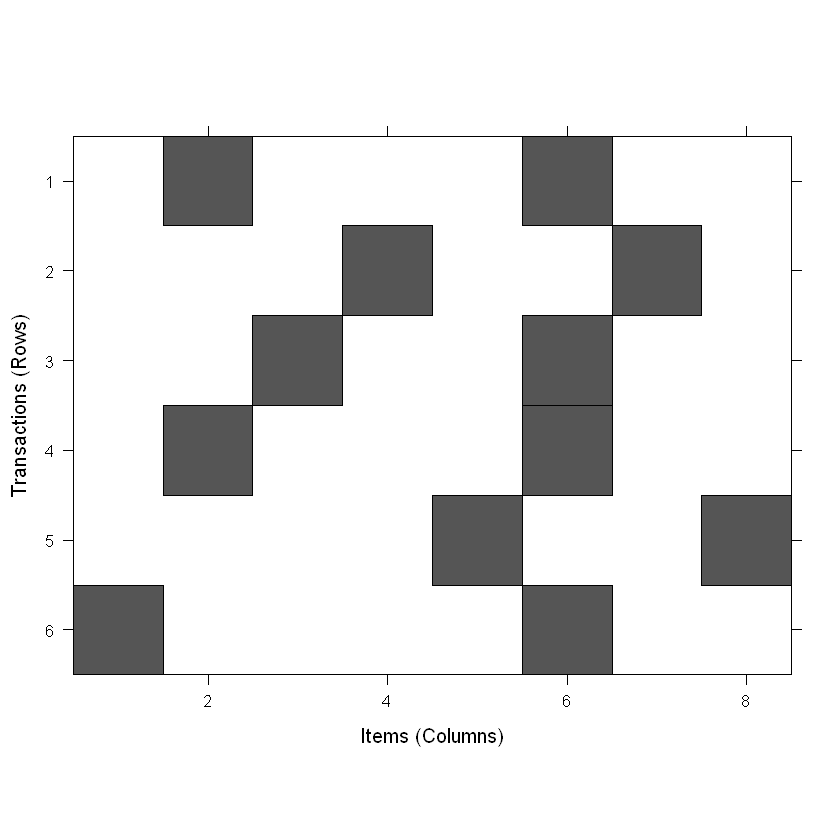

In [75]:
image(trans3)

In [76]:
a_df <- sample(c(LETTERS[1:5], NA), 10, T)

In [77]:
a_df <- data.frame(X=a_df, Y=sample(a_df))

In [78]:
a_df

,X,Y
1,E,E
2,E,E
3,C,NA
4,NA,E
5,A,NA
6,E,C
7,E,E
8,E,C
9,C,A
10,NA,E


In [79]:
trans3 <- as(a_df, "transactions")

In [80]:
trans3

transactions in sparse format with
 10 transactions (rows) and
 6 items (columns)

In [81]:
as(trans3, "data.frame")

,transactionID,items
1,1,"{X=E,Y=E}"
2,2,"{X=E,Y=E}"
3,3,{X=C}
4,4,{Y=E}
5,5,{X=A}
6,6,"{X=E,Y=C}"
7,7,"{X=E,Y=E}"
8,8,"{X=E,Y=C}"
9,9,"{X=C,Y=A}"
10,10,{Y=E}


In [82]:
data(Adult)

In [83]:
str(Adult)

Formal class 'transactions' [package "arules"] with 4 slots
  ..@ transactionInfo:'data.frame':	48842 obs. of  1 variable:
  .. ..$ transactionID: Factor w/ 48842 levels "1","10","100",..: 1 11112 22223 33334 43288 44399 45510 46621 47732 2 ...
  ..@ data           :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:612200] 1 10 25 32 35 50 59 61 63 65 ...
  .. .. ..@ p       : int [1:48843] 0 13 26 39 52 65 78 91 104 117 ...
  .. .. ..@ Dim     : int [1:2] 115 48842
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo       :'data.frame':	115 obs. of  3 variables:
  .. ..$ labels   :Class 'AsIs'  chr [1:115] "age=Young" "age=Middle-aged" "age=Senior" "age=Old" ...
  .. ..$ variables: Factor w/ 13 levels "age","capital-gain",..: 1 1 1 1 13 13 13 13 13 13 ...
  .. ..$ levels   : Factor w/ 112 levels "10th","11th",..: 111 63 92 69 30 54 65 82 90 91 ...
  ..@ itemsetInfo    :'data.frame':	

In [84]:
rules <- apriori(Adult, parameter=list(supp=0.5, conf=0.9, target="rules"))


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.9    0.1    1 none FALSE            TRUE     0.5      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.02s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [52 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [85]:
summary(rules)

set of 52 rules

rule length distribution (lhs + rhs):sizes
 1  2  3  4 
 2 13 24 13 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.923   3.250   4.000 

summary of quality measures:
    support         confidence          lift       
 Min.   :0.5084   Min.   :0.9031   Min.   :0.9844  
 1st Qu.:0.5415   1st Qu.:0.9155   1st Qu.:0.9937  
 Median :0.5974   Median :0.9229   Median :0.9997  
 Mean   :0.6436   Mean   :0.9308   Mean   :1.0036  
 3rd Qu.:0.7426   3rd Qu.:0.9494   3rd Qu.:1.0057  
 Max.   :0.9533   Max.   :0.9583   Max.   :1.0586  

mining info:
  data ntransactions support confidence
 Adult         48842     0.5        0.9

In [88]:
rules.sub <- subset(rules, subset = rhs %pin% "sex" & lift > 1.3)

In [93]:
rules.sub

set of 0 rules 

In [94]:
x <- matrix(rnorm(100), nrow=5)

In [95]:
dist(x)

         1        2        3        4
2 5.372303                           
3 5.365281 3.547701                  
4 5.941936 4.890133 4.376113         
5 6.617011 5.468108 5.637561 6.454277

In [96]:
dist(x, method="manhattan")

         1        2        3        4
2 19.00621                           
3 20.54485 11.86619                  
4 22.72415 16.98648 14.34176         
5 26.84410 19.61417 18.41263 23.23249

In [97]:
dist(x, method="maximum")

         1        2        3        4
2 2.902866                           
3 2.290860 2.020106                  
4 2.658064 2.498115 2.993079         
5 2.254291 2.602018 3.256380 3.576602

In [98]:
x <- c(0,0,1,1,1,1)

In [99]:
y <- c(1,0,1,1,0,1)

In [100]:
dist(rbind(x,y), method="binary")

    x
y 0.4

In [101]:
hamming <- function(x,y){sum(x != y)}

In [102]:
hamming(x,y)

[1] 2

In [103]:
x <- matrix(rnorm(100), nrow=5)

In [104]:
dist(x)

         1        2        3        4
2 5.176618                           
3 5.937566 5.504851                  
4 6.233673 6.744513 4.646154         
5 5.994146 5.814612 4.689227 5.350176

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


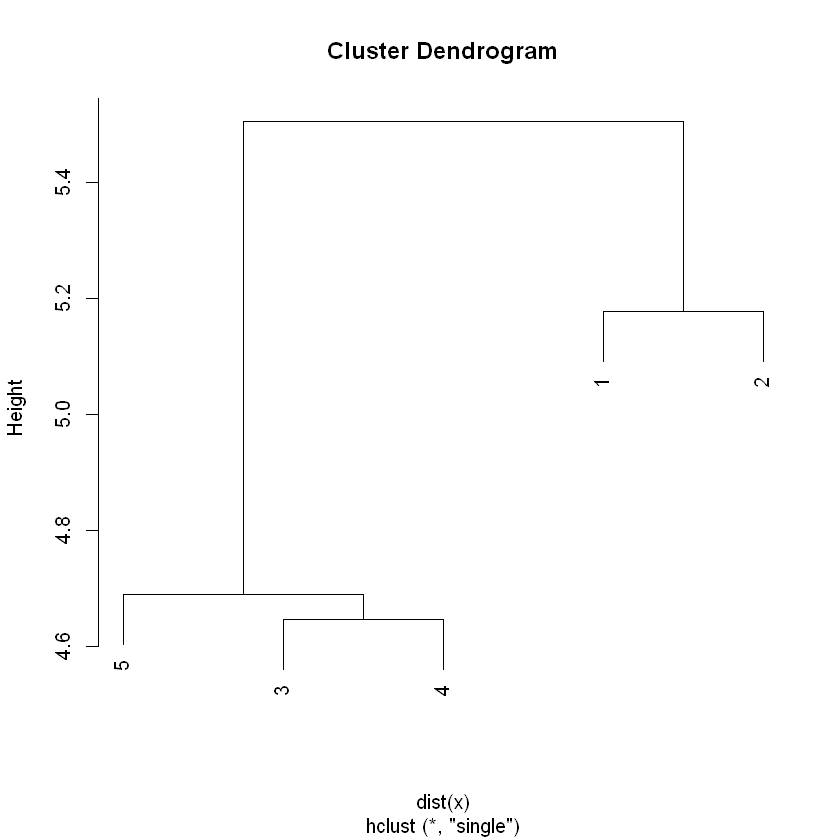

In [106]:
plot(h<-hclust(dist(x), method="single"))

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


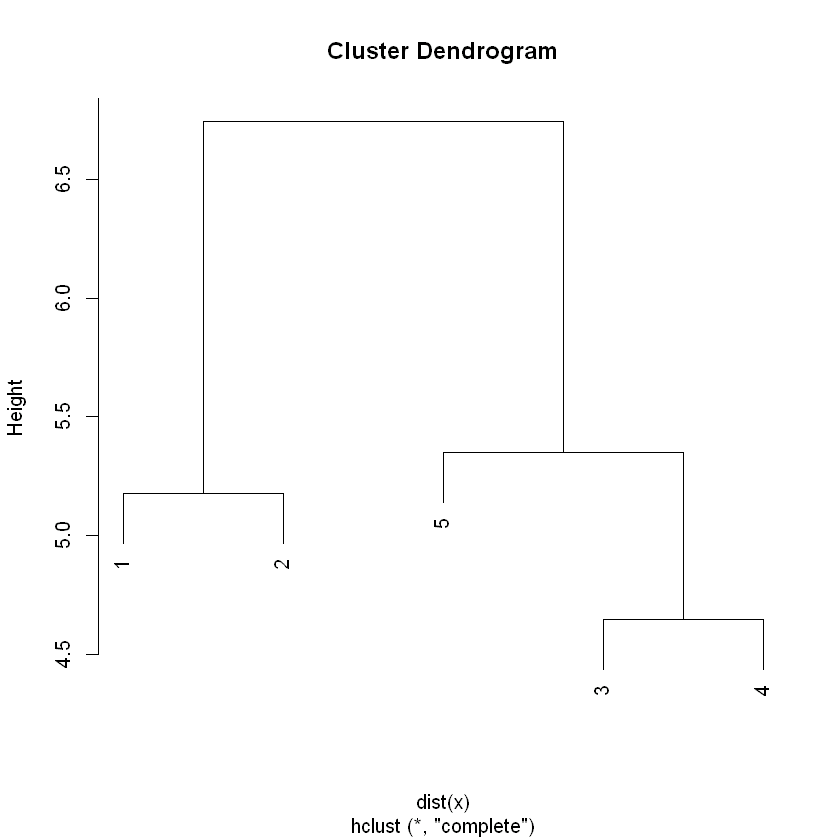

In [107]:
plot(h<-hclust(dist(x), method="complete"))

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


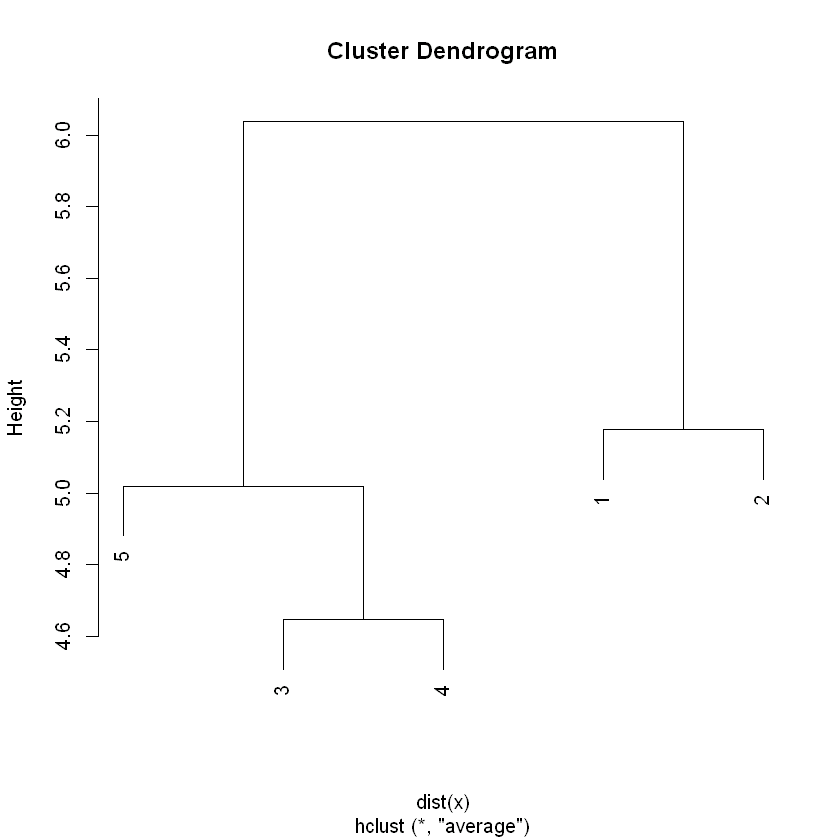

In [108]:
plot(h<-hclust(dist(x), method="average"))

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


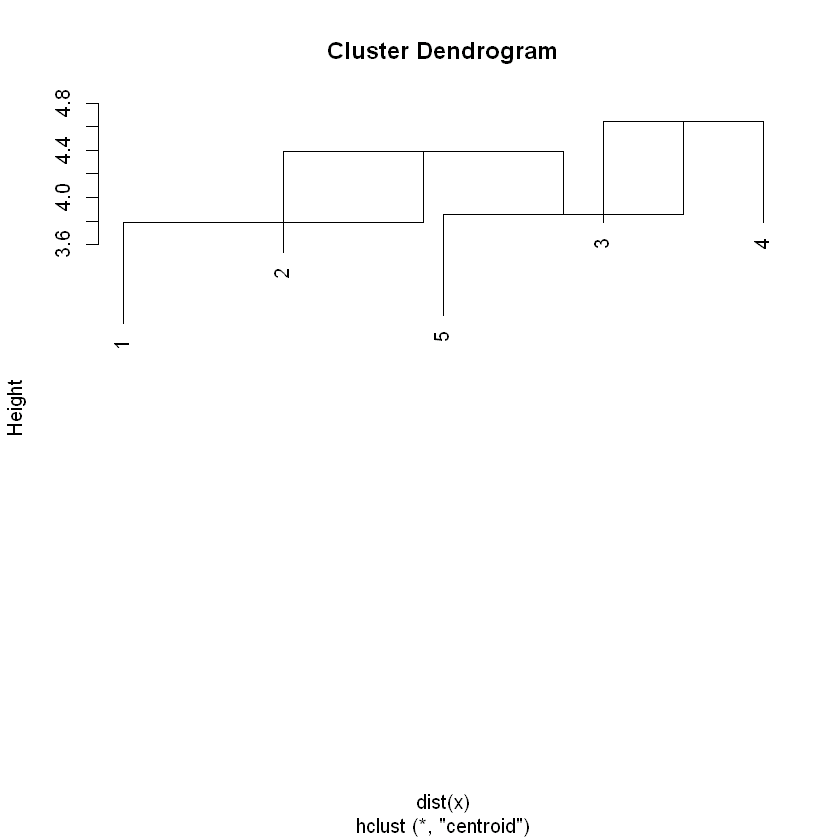

In [109]:
plot(h<-hclust(dist(x), method="centroid"), hang=-1)

In [110]:
x <- rbind(matrix(rnorm(100,sd=0.3), ncol=2), matrix(rnorm(100,mean=1,sd=0.3), ncol=2))

In [111]:
colnames(x) <- c("x", "y")

In [112]:
cl <- kmeans(x,2)

In [113]:
cl

K-means clustering with 2 clusters of sizes 50, 50

Cluster means:
           x          y
1 0.99478448 1.01338986
2 0.05779591 0.02198203

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 6.552825 6.174410
 (between_SS / total_SS =  78.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [114]:
cl <- kmeans(x,5,nstart=25)

In [115]:
cl

K-means clustering with 5 clusters of sizes 35, 14, 15, 21, 15

Cluster means:
           x           y
1  0.1895784  0.08576133
2  0.7179313  0.97496654
3  1.0959533  0.71843451
4  1.1070898  1.24968781
5 -0.2496966 -0.12683634

Clustering vector:
  [1] 5 1 5 1 1 1 1 5 5 5 1 1 1 5 1 1 1 5 1 5 1 1 5 1 1 5 1 1 1 1 5 1 5 1 1 5 1
 [38] 1 1 5 1 1 1 5 1 1 1 1 1 1 4 2 3 2 4 4 4 3 3 3 4 4 4 2 3 3 2 2 3 4 3 4 3 2
 [75] 3 2 4 3 2 4 4 4 2 4 4 4 3 2 3 4 4 2 2 4 2 4 2 3 4 3

Within cluster sum of squares by cluster:
[1] 2.3236487 0.5480705 0.6345940 1.3804838 1.3500778
 (between_SS / total_SS =  89.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [116]:
install.packages(c("mclust"), repos='http://cran.rstudio.com/')

package 'mclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\AppData\Local\Temp\Rtmp2xQ7Ua\downloaded_packages


In [117]:
library(mclust)

Package 'mclust' version 5.0.1
Type 'citation("mclust")' for citing this R package in publications.

Attaching package: 'mclust'

The following object is masked from 'package:psych':

    sim



In [118]:
x <- mvrnorm(100, c(0,0,0,0), diag(4)*0.7)

In [120]:
y <- mvrnorm(150, c(1,1,1,1), diag(4))

In [121]:
z <- mvrnorm(50, c(3,1,3,1), diag(4)*0.3)

In [122]:
x <- rbind(x,y,z)

In [123]:
x <- data.frame(x)

In [124]:
colnames(x) <- c("x1", "x2", "x3", "x4")

In [125]:
m1 <- Mclust(x)

In [127]:
m1$parameters

ERROR: Error in vapply(seq_along(mapped), function(i) {: 길이가 반드시 1이어야 하지만,
FUN(X[[4]])의 결과는 길이 0 입니다


$pro
[1] 0.2954852 0.5400408 0.1644739

$mean
           [,1]      [,2]      [,3]
x1 -0.066545265 1.0095195 3.1194452
x2  0.172442657 0.9912534 0.9210689
x3 -0.069965364 1.0049069 3.0225704
x4  0.004501105 0.9541380 0.8840197

$variance
$variance$modelName
[1] "VII"

$variance$d
[1] 4

$variance$G
[1] 3

$variance$sigma
, , 1

          x1        x2        x3        x4
x1 0.5999536 0.0000000 0.0000000 0.0000000
x2 0.0000000 0.5999536 0.0000000 0.0000000
x3 0.0000000 0.0000000 0.5999536 0.0000000
x4 0.0000000 0.0000000 0.0000000 0.5999536

, , 2

         x1       x2       x3       x4
x1 1.074353 0.000000 0.000000 0.000000
x2 0.000000 1.074353 0.000000 0.000000
x3 0.000000 0.000000 1.074353 0.000000
x4 0.000000 0.000000 0.000000 1.074353

, , 3

          x1        x2        x3        x4
x1 0.3052345 0.0000000 0.0000000 0.0000000
x2 0.0000000 0.3052345 0.0000000 0.0000000
x3 0.0000000 0.0000000 0.3052345 0.0000000
x4 0.0000000 0.0000000 0.0000000 0.3052345


$variance$sigmasq
[1] 0.5999

In [128]:
library(e1071)

In [129]:
data(iris)

In [130]:
attach(iris)

In [131]:
N = nrow(iris)

In [132]:
tr.idx = sample(1:N, size=N/2, replace=T)

In [133]:
y = iris[,5]

In [134]:
x.te <- iris[-tr.idx,-5]

In [135]:
x.tr <- iris[tr.idx,-5]

In [136]:
m2 <- svm(Species~., data=iris[tr.idx,], kernel="linear")

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


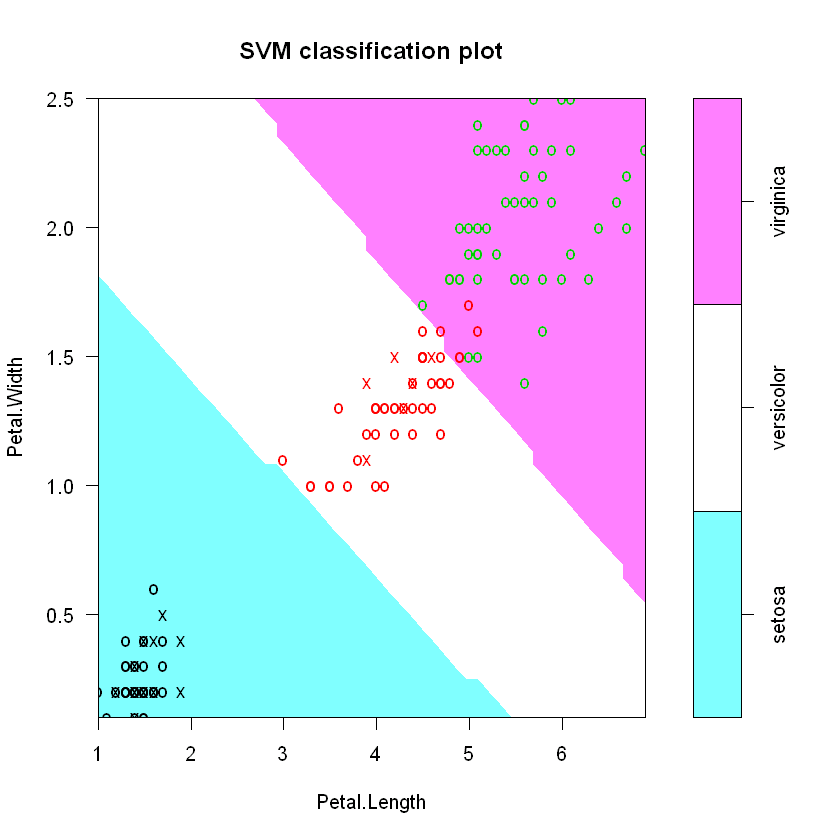

In [137]:
plot(m2, iris, Petal.Width~Petal.Length, slice=list(Sepal.Width=3, Sepal.Length=4))

In [138]:
summary(m2)


Call:
svm(formula = Species ~ ., data = iris[tr.idx, ], kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  19

 ( 8 2 9 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [139]:
pred <- predict(m2, x.te)

In [140]:
table(pred, y[-tr.idx])

            
pred         setosa versicolor virginica
  setosa         32          0         0
  versicolor      0         31         0
  virginica       0          3        28

In [141]:
pred <- predict(m2, x.te, decision.values=T)

In [142]:
attr(pred, "decision.values")[1:4,]

,virginica/setosa,virginica/versicolor,setosa/versicolor
2,-1.243971,-7.775535,1.407060
3,-1.351954,-8.166184,1.695438
4,-1.269762,-7.753982,1.569708
6,-1.249030,-8.306144,1.429445


ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


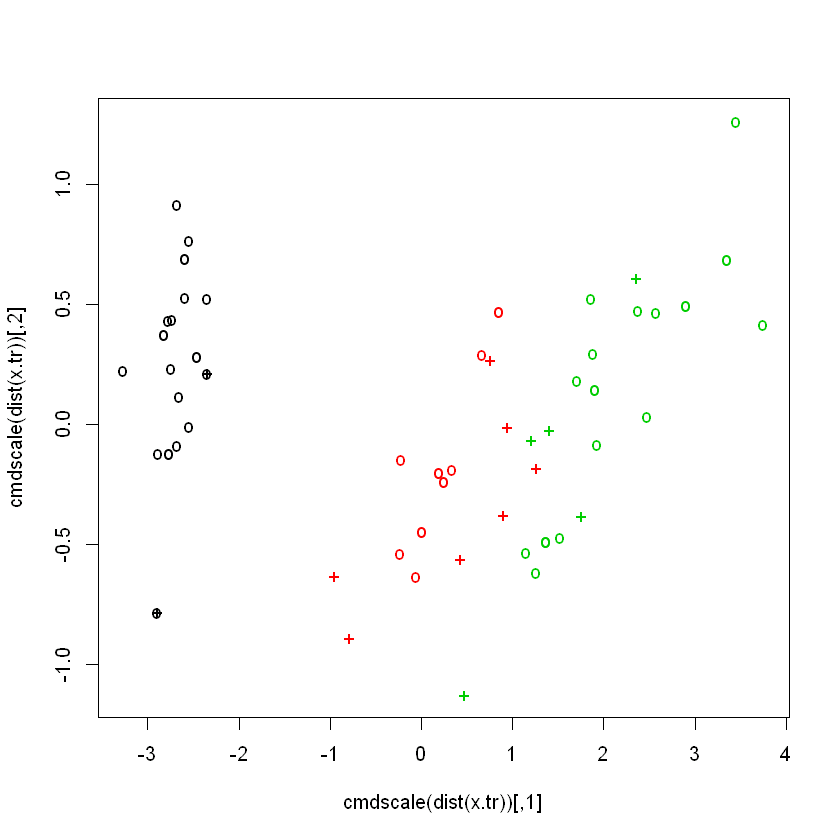

In [143]:
plot(cmdscale(dist(x.tr)), col=as.integer(y[tr.idx]), pch=c("o","+")[1:150 %in% m2$index + 1])

In [144]:
install.packages(c("ElemStatLearn"), repos='http://cran.rstudio.com/')

package 'ElemStatLearn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\AppData\Local\Temp\Rtmp2xQ7Ua\downloaded_packages


In [145]:
data(spam, package="ElemStatLearn")

In [147]:
str(spam)

'data.frame':	4601 obs. of  58 variables:
 $ A.1 : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ A.2 : num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ A.3 : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ A.4 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.5 : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...
 $ A.6 : num  0 0.28 0.19 0 0 0 0 0 0 0.32 ...
 $ A.7 : num  0 0.21 0.19 0.31 0.31 0 0 0 0.3 0.38 ...
 $ A.8 : num  0 0.07 0.12 0.63 0.63 1.85 0 1.88 0 0 ...
 $ A.9 : num  0 0 0.64 0.31 0.31 0 0 0 0.92 0.06 ...
 $ A.10: num  0 0.94 0.25 0.63 0.63 0 0.64 0 0.76 0 ...
 $ A.11: num  0 0.21 0.38 0.31 0.31 0 0.96 0 0.76 0 ...
 $ A.12: num  0.64 0.79 0.45 0.31 0.31 0 1.28 0 0.92 0.64 ...
 $ A.13: num  0 0.65 0.12 0.31 0.31 0 0 0 0 0.25 ...
 $ A.14: num  0 0.21 0 0 0 0 0 0 0 0 ...
 $ A.15: num  0 0.14 1.75 0 0 0 0 0 0 0.12 ...
 $ A.16: num  0.32 0.14 0.06 0.31 0.31 0 0.96 0 0 0 ...
 $ A.17: num  0 0.07 0.06 0 0 0 0 0 0 0 ...
 $ A.18: num  1.29 0.28 1.03 0 0 0 0.32 0 0.15 0.12 ...
 $ A.19: num  1.93 3.

In [148]:
model <- svm(spam ~., data=spam)

In [149]:
summary(model)


Call:
svm(formula = spam ~ ., data = spam)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01754386 

Number of Support Vectors:  1275

 ( 595 680 )


Number of Classes:  2 

Levels: 
 email spam




In [150]:
pred <- fitted(model)

In [151]:
obs <- spam$spam

In [152]:
table(pred,obs)

       obs
pred    email spam
  email  2697  151
  spam     91 1662

In [153]:
model <- svm(spam ~., data=spam, cross=10)

In [154]:
summary(model)


Call:
svm(formula = spam ~ ., data = spam, cross = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01754386 

Number of Support Vectors:  1275

 ( 595 680 )


Number of Classes:  2 

Levels: 
 email spam

10-fold cross-validation on training data:

Total Accuracy: 93.26233 
Single Accuracies:
 93.26087 92.82609 95.21739 93.47826 91.52174 94.56522 94.56522 92.17391 93.04348 91.97397 




In [155]:
obj <- tune(svm, spam ~ A.16 + A.53, data=spam, ranges=list(gamma=c(1.95, 2.05), cost=c(0.25, 0.35)))

In [156]:
summary(obj)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  2.05 0.35

- best performance: 0.1623545 

- Detailed performance results:
  gamma cost     error dispersion
1  1.95 0.25 0.1630062 0.01356942
2  2.05 0.25 0.1632236 0.01358748
3  1.95 0.35 0.1627893 0.01363160
4  2.05 0.35 0.1623545 0.01326323


ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


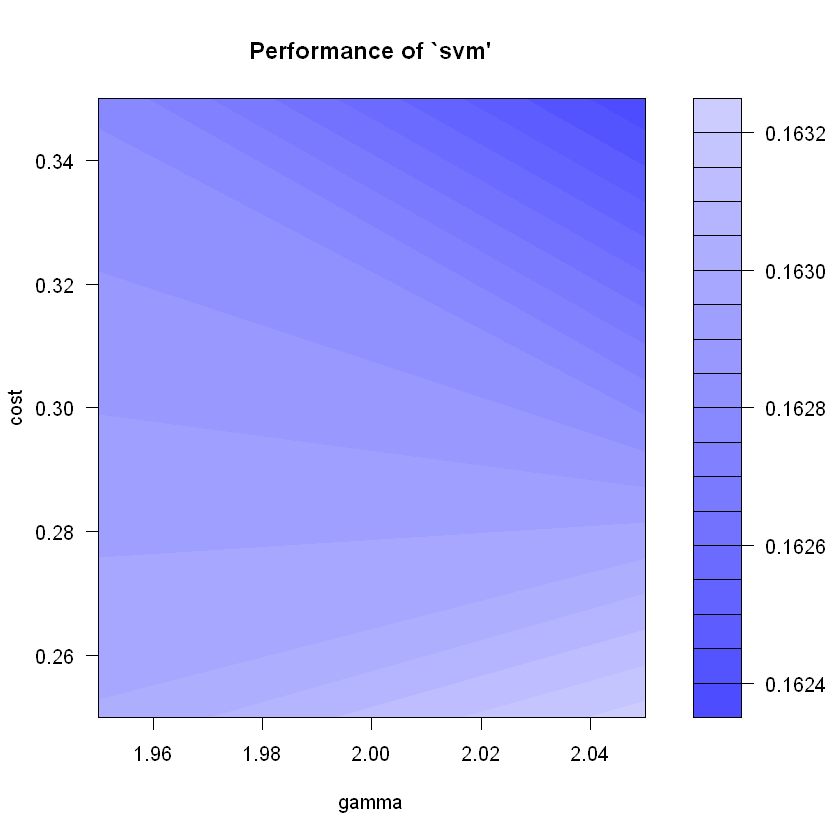

In [157]:
plot(obj)

In [158]:
library(rpart)

In [159]:
data(Ozone, package="mlbench")

In [160]:
index <- 1:nrow(Ozone)

In [161]:
testindex <- sample(index, trunc(length(index)/3))

In [162]:
testset <- na.omit(Ozone[testindex,-3])

In [163]:
trainset <- na.omit(Ozone[-testindex,-3])

In [164]:
svm.model <- svm(V4 ~., data=trainset, cost=1000, gamma=1e-04)

In [165]:
svm.pred <- predict(svm.model, testset[,-3])

In [166]:
crossprod(svm.pred - testset[,3]) / length(testindex)

12.56657


In [167]:
rpart.model <- rpart(V4 ~., data=trainset)

In [168]:
rpart.pred <- predict(rpart.model, testset[,-3])

In [169]:
crossprod(rpart.pred - testset[,3]) / length(testindex)

15.82365


In [170]:
help(crossprod)

crossprod {base},R Documentation
"x, y","numeric or complex matrices: y = NULL is taken to be the same matrix as x. Vectors are promoted to single-column or single-row matrices, depending on the context."


In [172]:
x <- seq(0,2*pi, length=100)

In [173]:
y <- sin(x) + rnorm(100)

In [174]:
m <- svm(x,y)

In [175]:
m


Call:
svm.default(x = x, y = y)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  92


In [176]:
new <- predict(m,x)

ERROR: Error in cairo_pdf(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


ERROR: Error in svg(tf, width, height, pointsize, FALSE, family, bg, antialias): unable to load winCairo.dll: was it built?


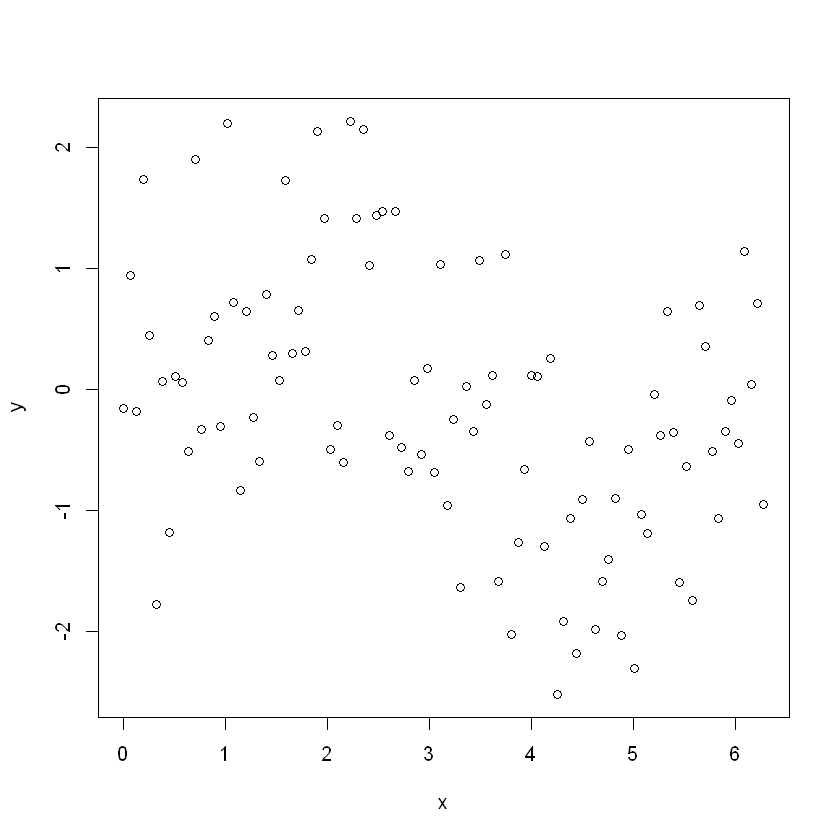

In [177]:
plot(x,y)